https://twitter.com/JohnRentoul/status/1392009981025669122
    
    


In [288]:
%%time
dataset_name = "W19_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')


Toggle code

Wall time: 1.07 s


In [7]:
# BES_PanelW20_comb = BES_Panel.copy()
gc.collect()

40

In [142]:
# BES_PanelW19_only = BES_Panel.copy()

In [ ]:
BES_Panel

In [127]:
## from W20 combined!
p_housingW19 = BES_Panel["p_housingW19"]



In [126]:
search(BES_Panel,"hous")

councilHouseW12               34394
houseBuildW12                 34394
preschoolKidsInHouseW19       32177
schoolKidsInHouseW19          32177
sickElderlyInHouseW19         32177
noDependentsInHouseW19        32177
preschoolKidsInHouseW20       31468
schoolKidsInHouseW20          31468
sickElderlyInHouseW20         31468
noDependentsInHouseW20        31468
preschoolKidsInHouseW1_W5     41912
schoolKidsInHouseW1_W5        41912
sickElderlyInHouseW1_W5       41912
noDependentsInHouseW1_W5      41912
preschoolKidsInHouseW6_W14    62582
schoolKidsInHouseW6_W14       62582
sickElderlyInHouseW6_W14      62582
noDependentsInHouseW6_W14     62582
headHouseholdPast             63607
p_gross_householdW1           30565
p_housingW1                   30492
p_gross_householdW2           30629
p_housingW2                   30620
p_gross_householdW3           28301
p_housingW3                   28293
p_gross_householdW4           31418
p_housingW4                   31370
p_gross_householdW5         

In [181]:
personal_inc_amalgamatedW20 = amalgamate_waves(BES_PanelW20_comb, "p_gross_personal", forward_fill=False,
                                               specify_wave_order = None,
                                               low_priority_values = ["Â\xa0Don't know","Â\xa0Prefer not to answer","Â Don't know","Â Prefer not to answer"], match=True)

Amalgamating variables: 
{1: 'p_gross_personalW1', 2: 'p_gross_personalW2', 3: 'p_gross_personalW3', 4: 'p_gross_personalW4', 5: 'p_gross_personalW5', 6: 'p_gross_personalW6', 7: 'p_gross_personalW7', 8: 'p_gross_personalW8', 9: 'p_gross_personalW9', 10: 'p_gross_personalW10', 11: 'p_gross_personalW11', 12: 'p_gross_personalW12', 13: 'p_gross_personalW13', 14: 'p_gross_personalW14', 15: 'p_gross_personalW15', 16: 'p_gross_personalW16', 17: 'p_gross_personalW17', 18: 'p_gross_personalW18', 19: 'p_gross_personalW19', 20: 'p_gross_personalW20'} ['p_gross_personalW1', 'p_gross_personalW2', 'p_gross_personalW3', 'p_gross_personalW4', 'p_gross_personalW5', 'p_gross_personalW6', 'p_gross_personalW7', 'p_gross_personalW8', 'p_gross_personalW9', 'p_gross_personalW10', 'p_gross_personalW11', 'p_gross_personalW12', 'p_gross_personalW13', 'p_gross_personalW14', 'p_gross_personalW15', 'p_gross_personalW16', 'p_gross_personalW17', 'p_gross_personalW18', 'p_gross_personalW19', 'p_gross_personalW20']


In [183]:
personal_inc_amalgamated.value_counts(dropna=False)

Â Prefer not to answer           12792
Â £10,000 to £14,999 per year    11435
Â £15,000 to £19,999 per year    10203
Â £20,000 to £24,999 per year     9515
Â £5,000 to £9,999 per year       9477
Â under £5,000 per year           8597
Â £25,000 to £29,999 per year     7492
Â £30,000 to £34,999 per year     5706
NaN                               4728
Â £35,000 to £39,999 per year     3903
Â £40,000 to £44,999 per year     2906
Â Don't know                      2499
Â £50,000 to £59,999 per year     2248
Â £45,000 to £49,999 per year     1905
Â £70,000 to £99,999 per year     1463
Â £60,000 to £69,999 per year     1241
Â £100,000 and over                896
Name: p_gross_personalW1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19, dtype: int64

In [ ]:
personal_inc_amalgamated

In [175]:
manual_amalgamate = BES_PanelW20_comb[search(BES_PanelW20_comb,"p_gross_personal").index].replace("Â\xa0Don't know",np.nan).replace("Â\xa0Prefer not to answer",np.nan)

In [171]:
manual_amalgamate

,p_gross_personalW1,p_gross_personalW2,p_gross_personalW3,p_gross_personalW4,p_gross_personalW5,p_gross_personalW6,p_gross_personalW7,p_gross_personalW8,p_gross_personalW9,p_gross_personalW10,p_gross_personalW11,p_gross_personalW12,p_gross_personalW13,p_gross_personalW14,p_gross_personalW15,p_gross_personalW16,p_gross_personalW17,p_gross_personalW18,p_gross_personalW19,p_gross_personalW20
id,,,,,,,,,,,,,,,,,,,,
1,"Â Â£10,000 to Â£14,999 per year","Â Â£10,000 to Â£14,999 per year",NaN,"Â Â£10,000 to Â£14,999 per year","Â Â£10,000 to Â£14,999 per year","Â Â£10,000 to Â£14,999 per year","Â Â£15,000 to Â£19,999 per year","Â Â£15,000 to Â£19,999 per year","Â Â£15,000 to Â£19,999 per year","Â Â£15,000 to Â£19,999 per year",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Â Â£50,000 to Â£59,999 per year",NaN,"Â Â£25,000 to Â£29,999 per year","Â Â£35,000 to Â£39,999 per year","Â Â£35,000 to Â£39,999 per year","Â Â£35,000 to Â£39,999 per year","Â Â£25,000 to Â£29,999 per year","Â Â£25,000 to Â£29,999 per year","Â Â£25,000 to Â£29,999 per year","Â Â£35,000 to Â£39,999 per year","Â Â£35,000 to Â£39,999 per year","Â Â£35,000 to Â£39,999 per year","Â Â£35,000 to Â£39,999 per year","Â Â£30,000 to Â£34,999 per year",NaN,NaN,"Â Â£10,000 to Â£14,999 per year","Â Â£10,000 to Â£14,999 per year","Â Â£10,000 to Â£14,999 per year","Â Â£15,000 to Â£19,999 per year"
3,"Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year",NaN,NaN,"Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year","Â Â£5,000 to Â£9,999 per year",NaN,NaN,"Â Â£5,000 to Â£9,999 per year",NaN
4,"Â Â£10,000 to Â£14,999 per year","Â Â£10,000 to Â£14,999 per year",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Â Â£25,000 to Â£29,999 per year","Â Â£25,000 to Â£29,999 per year",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Â Â£60,000 to Â£69,999 per year"
102855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Â Â£35,000 to Â£39,999 per year"
102856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Â Â£50,000 to Â£59,999 per year"


In [169]:
manual_amalgamate.stack().value_counts().index[9]

"Â\xa0Don't know"

In [204]:
personal_inc_amalgamatedW20_manual = manual_amalgamate.ffill(axis=1)["p_gross_personalW20"]

In [413]:
personal_inc_amalgamatedW1_manual = manual_amalgamate.bfill(axis=1)["p_gross_personalW1"]
personal_inc_amalgamatedW1_manual = personal_inc_amalgamatedW1_manual.cat.add_categories(BES_PanelW20_comb["p_gross_personalW1"].cat.categories[-2:])
personal_inc_amalgamatedW1_manual.loc[personal_inc_amalgamatedW1_manual.isnull()] = BES_PanelW20_comb.loc[personal_inc_amalgamatedW1_manual.isnull(),"p_gross_personalW1"]

In [414]:
personal_inc_amalgamatedW1_manual.value_counts(dropna=False)

NaN                                15354
Â Â£10,000 to Â£14,999 per year    11785
Â Â£15,000 to Â£19,999 per year    10735
Â Â£5,000 to Â£9,999 per year      10572
Â under Â£5,000 per year           10264
Â Â£20,000 to Â£24,999 per year     9769
Â Â£25,000 to Â£29,999 per year     7752
Â Â£30,000 to Â£34,999 per year     5851
Â Prefer not to answer              4177
Â Â£35,000 to Â£39,999 per year     4009
Â Â£40,000 to Â£44,999 per year     2960
Â Â£50,000 to Â£59,999 per year     2170
Â Â£45,000 to Â£49,999 per year     1907
Â Â£70,000 to Â£99,999 per year     1391
Â Â£60,000 to Â£69,999 per year     1185
Â Â£100,000 and over                 909
Â Don't know                         623
Name: p_gross_personalW1, dtype: int64

In [203]:
personal_inc_amalgamatedW20_manual

Index(['Â under Â£5,000 per year', 'Â Â£5,000 to Â£9,999 per year',
       'Â Â£10,000 to Â£14,999 per year', 'Â Â£15,000 to Â£19,999 per year',
       'Â Â£20,000 to Â£24,999 per year', 'Â Â£25,000 to Â£29,999 per year',
       'Â Â£30,000 to Â£34,999 per year', 'Â Â£35,000 to Â£39,999 per year',
       'Â Â£40,000 to Â£44,999 per year', 'Â Â£45,000 to Â£49,999 per year',
       'Â Â£50,000 to Â£59,999 per year', 'Â Â£60,000 to Â£69,999 per year',
       'Â Â£70,000 to Â£99,999 per year', 'Â Â£100,000 and over',
       'Â Don't know', 'Â Prefer not to answer'],
      dtype='object')

In [206]:
personal_inc_amalgamatedW20_manual = personal_inc_amalgamatedW20_manual.cat.add_categories(BES_PanelW20_comb["p_gross_personalW20"].cat.categories[-2:])

In [207]:
# pref_not_to_answer = BES_PanelW20_comb["p_gross_personalW20"].cat.categories[-1]
personal_inc_amalgamatedW20_manual.loc[personal_inc_amalgamatedW20_manual.isnull()] = BES_PanelW20_comb.loc[personal_inc_amalgamatedW20_manual.isnull(),"p_gross_personalW20"]

In [208]:
personal_inc_amalgamatedW20_manual.value_counts()

Â Â£10,000 to Â£14,999 per year    11949
Â Â£15,000 to Â£19,999 per year    10586
Â Â£20,000 to Â£24,999 per year    10053
Â Â£5,000 to Â£9,999 per year       9838
Â under Â£5,000 per year            9115
Â Â£25,000 to Â£29,999 per year     7975
Â Â£30,000 to Â£34,999 per year     6060
Â Â£35,000 to Â£39,999 per year     4133
Â Prefer not to answer              3972
Â Â£40,000 to Â£44,999 per year     3157
Â Â£50,000 to Â£59,999 per year     2466
Â Â£45,000 to Â£49,999 per year     2024
Â Â£70,000 to Â£99,999 per year     1588
Â Â£60,000 to Â£69,999 per year     1351
Â Â£100,000 and over                 964
Â Don't know                         653
Name: p_gross_personalW20, dtype: int64

In [210]:
personal_inc_amalgamatedW20_manual[BES_PanelW19_only.index].value_counts()

Â Â£10,000 to Â£14,999 per year    4404
Â Â£15,000 to Â£19,999 per year    3531
Â Â£20,000 to Â£24,999 per year    3374
Â Â£5,000 to Â£9,999 per year      3290
Â Â£25,000 to Â£29,999 per year    2701
Â under Â£5,000 per year           2566
Â Prefer not to answer             2265
Â Â£30,000 to Â£34,999 per year    2098
Â Â£35,000 to Â£39,999 per year    1399
Â Â£40,000 to Â£44,999 per year    1086
Â Â£50,000 to Â£59,999 per year     868
Â Â£45,000 to Â£49,999 per year     706
Â Â£70,000 to Â£99,999 per year     573
Â Â£60,000 to Â£69,999 per year     464
Â Don't know                        304
Â Â£100,000 and over                302
Name: p_gross_personalW20, dtype: int64

In [211]:
2265/BES_PanelW19_only.shape[0]

0.0703918948317121

In [155]:
BES_PanelW20_comb.loc[personal_inc_amalgamatedW20_manual.isnull(),"p_gross_personalW20"].value_counts()

Â Prefer not to answer             0
Â Don't know                       0
Â Â£100,000 and over               0
Â Â£70,000 to Â£99,999 per year    0
Â Â£60,000 to Â£69,999 per year    0
Â Â£50,000 to Â£59,999 per year    0
Â Â£45,000 to Â£49,999 per year    0
Â Â£40,000 to Â£44,999 per year    0
Â Â£35,000 to Â£39,999 per year    0
Â Â£30,000 to Â£34,999 per year    0
Â Â£25,000 to Â£29,999 per year    0
Â Â£20,000 to Â£24,999 per year    0
Â Â£15,000 to Â£19,999 per year    0
Â Â£10,000 to Â£14,999 per year    0
Â Â£5,000 to Â£9,999 per year      0
Â under Â£5,000 per year           0
Name: p_gross_personalW20, dtype: int64

In [153]:
personal_inc_amalgamatedW20_manual

1         Â Â£15,000 to Â£19,999 per year
2         Â Â£15,000 to Â£19,999 per year
3           Â Â£5,000 to Â£9,999 per year
4         Â Â£10,000 to Â£14,999 per year
5         Â Â£25,000 to Â£29,999 per year
                       ...               
102854    Â Â£60,000 to Â£69,999 per year
102855    Â Â£35,000 to Â£39,999 per year
102856    Â Â£50,000 to Â£59,999 per year
102857    Â Â£15,000 to Â£19,999 per year
102858    Â Â£15,000 to Â£19,999 per year
Name: p_gross_personalW20, Length: 101413, dtype: category
Categories (16, object): [Â under Â£5,000 per year < Â Â£5,000 to Â£9,999 per year < Â Â£10,000 to Â£14,999 per year < Â Â£15,000 to Â£19,999 per year ... Â Â£70,000 to Â£99,999 per year < Â Â£100,000 and over < Â Don't know < Â Prefer not to answer]

In [122]:
12792/personal_inc_amalgamated.shape[0]

0.13186813186813187

In [140]:
personal_inc_amalgamatedW20.loc[BES_Panel.index].value_counts()

Â Prefer not to answer             6648
Â Â£10,000 to Â£14,999 per year    3897
Â Â£15,000 to Â£19,999 per year    3124
Â Â£20,000 to Â£24,999 per year    3035
Â Â£5,000 to Â£9,999 per year      2833
Â Â£25,000 to Â£29,999 per year    2428
Â under Â£5,000 per year           2106
Â Â£30,000 to Â£34,999 per year    1892
Â Â£35,000 to Â£39,999 per year    1261
Â Don't know                       1191
Â Â£40,000 to Â£44,999 per year     988
Â Â£50,000 to Â£59,999 per year     793
Â Â£45,000 to Â£49,999 per year     646
Â Â£70,000 to Â£99,999 per year     535
Â Â£60,000 to Â£69,999 per year     434
Â Â£100,000 and over                259
Name: p_gross_personalW1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19&20, dtype: int64

In [136]:
4380/BES_Panel.shape[0]

0.13612207477390684

In [119]:
BES_Panel["p_gross_personalW19"].value_counts()

Â Prefer not to answer           6862
Â £10,000 to £14,999 per year    3809
Â £15,000 to £19,999 per year    3140
Â £20,000 to £24,999 per year    2936
Â £5,000 to £9,999 per year      2839
Â £25,000 to £29,999 per year    2365
Â under £5,000 per year          2081
Â £30,000 to £34,999 per year    1891
Â Don't know                     1258
Â £35,000 to £39,999 per year    1258
Â £40,000 to £44,999 per year     945
Â £50,000 to £59,999 per year     769
Â £45,000 to £49,999 per year     661
Â £70,000 to £99,999 per year     520
Â £60,000 to £69,999 per year     420
Â £100,000 and over               262
Name: p_gross_personalW19, dtype: int64

In [4]:
search(BES_Panel,"pastvote|profile_past_vote_2017|profile_gross_household|profile_gross_personal")

pastvote_ge_2019           28284
pastvote_eup_2019          23186
profile_gross_household    32167
profile_gross_personal     32002
profile_past_vote_2017     28337
dtype: int64

In [12]:
search(pan_dataset_votes,"2019|2017")

2017GEVote             70248
2017GEVote_complete    97006
2017GEVote_simple      96529
2019GEVote             31784
2019GEVote_complete    97006
2019GEVote_simple      96529
2019EEVote             47902
2019EEVote_complete    97006
2019EEVote_simple      96529
2017LE                 32026
2017LE_complete        97006
2017LE_simple          96529
2019LE                 23403
2019LE_complete        97006
2019LE_simple          96529
dtype: int64

In [135]:
df = BES_Panel[["profile_gross_household","profile_gross_personal","pastvote_ge_2019","profile_past_vote_2017",
                "profile_socialgrade_cie","subjClass","ns_sec","ns_sec_analytic"]]
df["2005GE"] = pan_dataset_votes.loc[BES_Panel.index,"2005GEVote_complete"]
df["2010GE"] = pan_dataset_votes.loc[BES_Panel.index,"2010GEVote_complete"]
df["2015GE"] = pan_dataset_votes.loc[BES_Panel.index,"2015GEVote_complete"]
df["2017GE"] = pan_dataset_votes.loc[BES_Panel.index,"2017GEVote_complete"]
df["2019GE"] = pan_dataset_votes.loc[BES_Panel.index,"2019GEVote_complete"]

df["wt"] = BES_Panel["wt"]

df["house_tenure"] = p_housingW19.loc[BES_Panel.index]
country_replace = {1:"England",2:"Scotland",3:"Wales"}
BES_Panel["country"] = BES_Panel["country"].replace(country_replace)
df["country"] = BES_Panel.loc[df.index,"country"]
df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
df["Age_at_W19"] = pan_dataset_ages.loc[df.index,"Age_at_W19"]
df["Age_at_W19"] = pan_dataset_ages.loc[df.index,"Age_at_W19"]

In [4]:
search(BES_Panel,"ns_sec")

ns_sec             26107
ns_sec_analytic    26107
dtype: int64

In [6]:
BES_Panel["ns_sec_analytic"]

id
2        Lower professional and managerial and higher s...
3                                 Semi-routine occupations
6                                 Intermediate occupations
7              Lower supervisory and technical occupations
14       Lower professional and managerial and higher s...
                               ...                        
98435                      Higher professional occupations
98437                             Intermediate occupations
98440                      Higher professional occupations
98445                             Semi-routine occupations
98449                                  Routine occupations
Name: ns_sec_analytic, Length: 32177, dtype: category
Categories (8, object): [Employers in large organisations and higher ma... < Higher professional occupations < Lower professional and managerial and higher s... < Intermediate occupations < Employers in small organisations and own accou... < Lower supervisory and technical occupations < Semi-r

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

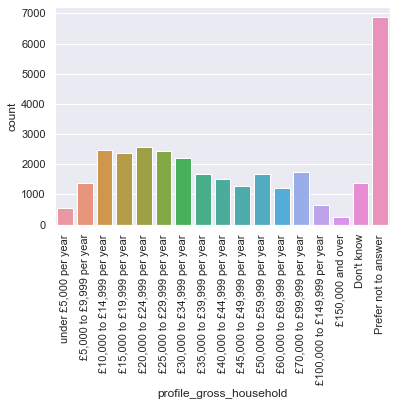

In [219]:
sns.countplot( df["profile_gross_household"] );
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

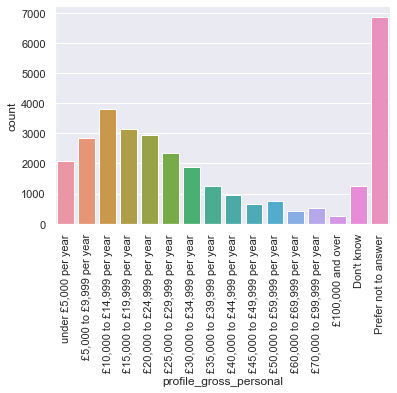

In [220]:
sns.countplot( df["profile_gross_personal"] );
plt.xticks(rotation=90)

Text(0.5, 1.0, "With Imputation to fill in 'Prefer not to answer' values")

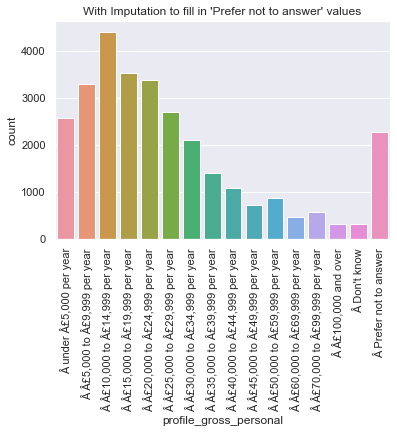

In [319]:
sns.countplot( df["profile_gross_personal"] );
plt.xticks(rotation=90);
plt.title("With Imputation to fill in 'Prefer not to answer' values")

In [222]:
# personal_inc_amalgamatedW20_manual.loc[BES_PanelW19_only.index]

In [432]:
df["profile_gross_personal"] = personal_inc_amalgamatedW20_manual.loc[BES_PanelW19_only.index]

In [425]:
df["profile_gross_personalW1"] = personal_inc_amalgamatedW1_manual.loc[BES_PanelW19_only.index]

In [417]:
personal_inc_amalgamatedW1_manual.loc[BES_PanelW19_only.index]

id
2        Â Â£50,000 to Â£59,999 per year
3          Â Â£5,000 to Â£9,999 per year
6        Â Â£25,000 to Â£29,999 per year
7        Â Â£35,000 to Â£39,999 per year
14       Â Â£35,000 to Â£39,999 per year
                      ...               
98435    Â Â£35,000 to Â£39,999 per year
98437    Â Â£20,000 to Â£24,999 per year
98440                                NaN
98445           Â under Â£5,000 per year
98449           Â under Â£5,000 per year
Name: p_gross_personalW1, Length: 32177, dtype: category
Categories (16, object): [Â under Â£5,000 per year < Â Â£5,000 to Â£9,999 per year < Â Â£10,000 to Â£14,999 per year < Â Â£15,000 to Â£19,999 per year ... Â Â£70,000 to Â£99,999 per year < Â Â£100,000 and over < Â Don't know < Â Prefer not to answer]

In [23]:
personal_inc = df["profile_gross_personal"].cat.codes
personal_inc.max()

15

In [35]:
personal_inc.replace(-1,np.nan).replace(14,np.nan).replace(15,np.nan).quantile(q=[0.0,0.2,.4,.6,.8,1.0])

0.0     0.0
0.2     1.0
0.4     3.0
0.6     4.0
0.8     7.0
1.0    13.0
dtype: float64

In [ ]:
personal_inc.replace(-1,np.nan).replace(14,np.nan).replace(15,np.nan).quantile(q=[0.0,0.2,.4,.6,.8,1.0])

In [232]:
drop_cats = df["profile_gross_personal"].cat.categories[-2:]
mask = df["profile_gross_personal"].cat.remove_categories(drop_cats).cat.codes.replace(-1,np.nan).notnull()&df["wt"].notnull()

In [239]:
df["profile_gross_personal"].cat.remove_categories(drop_cats)[mask]

id
2        Â Â£15,000 to Â£19,999 per year
3          Â Â£5,000 to Â£9,999 per year
6        Â Â£35,000 to Â£39,999 per year
7        Â Â£30,000 to Â£34,999 per year
14       Â Â£30,000 to Â£34,999 per year
                      ...               
98434    Â Â£50,000 to Â£59,999 per year
98435    Â Â£35,000 to Â£39,999 per year
98437    Â Â£20,000 to Â£24,999 per year
98445    Â Â£35,000 to Â£39,999 per year
98449           Â under Â£5,000 per year
Name: profile_gross_personal, Length: 27362, dtype: category
Categories (14, object): [Â under Â£5,000 per year < Â Â£5,000 to Â£9,999 per year < Â Â£10,000 to Â£14,999 per year < Â Â£15,000 to Â£19,999 per year ... Â Â£50,000 to Â£59,999 per year < Â Â£60,000 to Â£69,999 per year < Â Â£70,000 to Â£99,999 per year < Â Â£100,000 and over]

In [238]:
weighted_qcut(df["profile_gross_personal"].cat.remove_categories(drop_cats)[mask],df["wt"][mask],q=5)

id
2        (0.4, 0.6]
3        (0.2, 0.4]
6        (0.8, 1.0]
7        (0.8, 1.0]
14       (0.8, 1.0]
            ...    
98434    (0.8, 1.0]
98435    (0.8, 1.0]
98437    (0.6, 0.8]
98445    (0.8, 1.0]
98449    (0.0, 0.2]
Name: wt, Length: 27362, dtype: category
Categories (5, interval[float64]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1.0]]

In [433]:
# replace_dict = {"Don't know":np.nan,'Prefer not to answer':np.nan}
personal_inc = pd.qcut(df["profile_gross_personal"].cat.remove_categories(drop_cats).cat.codes.replace(-1,np.nan),q=[0.0,0.2,.4,.6,.8,1.0])
inc_cats = df["profile_gross_personal"].cat.categories
personal_inc = personal_inc.cat.rename_categories([inc_cats[float(str(x.left).replace("-0.001","0"))]+"-"+inc_cats[float(str(x.right))] for x in personal_inc.cat.categories])

In [248]:
personal_inc.value_counts()

Â Â£5,000 to Â£9,999 per year-Â Â£15,000 to Â£19,999 per year      7935
Â under Â£5,000 per year-Â Â£5,000 to Â£9,999 per year             5856
Â Â£30,000 to Â£34,999 per year-Â Â£100,000 and over               5398
Â Â£20,000 to Â£24,999 per year-Â Â£30,000 to Â£34,999 per year    4799
Â Â£15,000 to Â£19,999 per year-Â Â£20,000 to Â£24,999 per year    3374
dtype: int64

In [434]:
personal_inc = personal_inc.cat.add_categories(["Don't know","Prefer not to answer"])
personal_inc.loc[df["profile_gross_personal"]==drop_cats[0]]="Don't know"
personal_inc.loc[df["profile_gross_personal"]==drop_cats[1]]="Prefer not to answer"

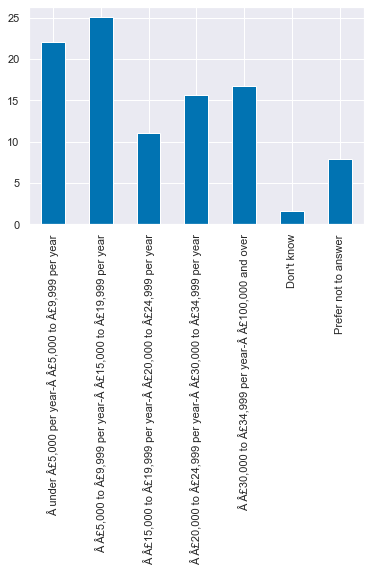

In [435]:
(100*BES_Panel["wt"].groupby(personal_inc).sum()/BES_Panel["wt"][personal_inc.notnull()].sum()).plot(kind='bar');

In [426]:
# replace_dict = {"Don't know":np.nan,'Prefer not to answer':np.nan}
personal_inc = pd.qcut(df["profile_gross_personalW1"].cat.remove_categories(drop_cats).cat.codes.replace(-1,np.nan),q=[0.0,0.2,.4,.6,.8,1.0])
inc_cats = df["profile_gross_personalW1"].cat.categories
personal_inc = personal_inc.cat.rename_categories([inc_cats[float(str(x.left).replace("-0.001","0"))]+"-"+inc_cats[float(str(x.right))] for x in personal_inc.cat.categories])

In [427]:
personal_inc = personal_inc.cat.add_categories(["Don't know","Prefer not to answer"])
personal_inc.loc[df["profile_gross_personal"]==drop_cats[0]]="Don't know"
personal_inc.loc[df["profile_gross_personal"]==drop_cats[1]]="Prefer not to answer"

In [447]:
df["personal_inc_quintiles"].value_counts()

Â Â£5,000 to Â£9,999 per year-Â Â£15,000 to Â£19,999 per year      7935
Â under Â£5,000 per year-Â Â£5,000 to Â£9,999 per year             5856
Â Â£30,000 to Â£34,999 per year-Â Â£100,000 and over               5398
Â Â£20,000 to Â£24,999 per year-Â Â£30,000 to Â£34,999 per year    4799
Â Â£15,000 to Â£19,999 per year-Â Â£20,000 to Â£24,999 per year    3374
Prefer not to answer                                               2265
Don't know                                                          304
Name: personal_inc_quintiles, dtype: int64

In [446]:
df["personal_inc_quintiles"] = personal_inc

In [249]:
drop_cats

Index(['Â Don't know', 'Â Prefer not to answer'], dtype='object')

In [80]:
drop_vote_categories = ["TYTV(Def)","TYTV(Maybe)","UNK"]

In [83]:
round(pd.crosstab(df["2017GE"].cat.remove_categories(drop_vote_categories), df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)

personal_inc_quintiles,"under £5,000 per year-£5,000 to £9,999 per year","£5,000 to £9,999 per year-£15,000 to £19,999 per year","£15,000 to £19,999 per year-£20,000 to £24,999 per year","£20,000 to £24,999 per year-£35,000 to £39,999 per year","£35,000 to £39,999 per year-£100,000 and over",Don't know,Prefer not to answer
2017GE,,,,,,,
CON,25.1,32.3,34.0,33.3,40.0,23.2,36.8
DK,1.9,1.7,1.2,1.5,1.0,2.7,3.5
GP,2.1,1.7,1.3,1.9,1.5,1.9,1.7
LAB,31.9,31.9,34.3,35.5,29.5,32.6,27.0
LD,5.5,5.9,6.8,6.6,10.4,4.2,5.6
OTH,0.9,1.1,1.1,1.0,0.7,0.4,1.4
PC,0.3,0.5,0.4,0.2,0.2,0.5,0.3
SNP,3.0,2.8,3.2,2.4,2.3,2.0,2.6
UKIP,2.5,2.4,1.7,1.8,1.2,2.8,2.4


In [84]:
round(pd.crosstab(df["2019GE"].cat.remove_categories(drop_vote_categories),
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)

personal_inc_quintiles,"under £5,000 per year-£5,000 to £9,999 per year","£5,000 to £9,999 per year-£15,000 to £19,999 per year","£15,000 to £19,999 per year-£20,000 to £24,999 per year","£20,000 to £24,999 per year-£35,000 to £39,999 per year","£35,000 to £39,999 per year-£100,000 and over",Don't know,Prefer not to answer
2019GE,,,,,,,
BXP,1.7,2.2,1.6,1.3,0.8,1.7,1.6
CON,28.6,35.6,35.4,34.9,40.2,24.8,39.6
DK,1.1,0.6,0.6,0.5,0.3,2.5,2.8
GP,2.1,2.0,1.7,2.4,2.4,1.7,1.8
LAB,27.8,24.6,27.6,30.0,25.6,29.4,20.9
LD,8.4,8.0,9.2,10.7,15.8,6.1,8.0
OTH,1.1,1.1,1.1,0.9,0.7,0.7,1.2
PC,0.2,0.7,0.5,0.3,0.3,0.3,0.3
SNP,3.6,3.4,3.8,3.0,2.7,2.1,2.7


In [87]:
round(pd.crosstab(df["2015GE"].cat.remove_categories(drop_vote_categories), df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)

personal_inc_quintiles,"under £5,000 per year-£5,000 to £9,999 per year","£5,000 to £9,999 per year-£15,000 to £19,999 per year","£15,000 to £19,999 per year-£20,000 to £24,999 per year","£20,000 to £24,999 per year-£35,000 to £39,999 per year","£35,000 to £39,999 per year-£100,000 and over",Don't know,Prefer not to answer
2015GE,,,,,,,
BNP,0.1,0.1,0.1,0.1,0.0,0.0,0.0
CON,21.7,27.6,28.9,29.9,37.9,20.2,31.3
DK,2.4,1.9,1.4,1.6,1.2,3.9,4.2
GP,4.5,3.9,5.2,4.7,3.5,4.5,3.2
LAB,24.3,25.1,24.0,26.1,24.0,25.2,22.2
LD,6.1,6.7,7.6,7.7,8.8,5.5,5.9
OTH,1.0,1.1,1.0,1.2,1.0,1.4,1.7
PC,0.4,0.4,0.4,0.3,0.3,0.5,0.3
SNP,3.4,3.5,3.9,2.7,2.6,3.0,3.0


In [99]:
round(pd.crosstab(df["2010GE"].cat.remove_categories(drop_vote_categories),
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)

personal_inc_quintiles,"under £5,000 per year-£5,000 to £9,999 per year","£5,000 to £9,999 per year-£15,000 to £19,999 per year","£15,000 to £19,999 per year-£20,000 to £24,999 per year","£20,000 to £24,999 per year-£35,000 to £39,999 per year","£35,000 to £39,999 per year-£100,000 and over",Don't know,Prefer not to answer
2010GE,,,,,,,
BNP,1.2,1.1,0.7,0.9,0.6,0.8,0.7
CON,25.8,28.3,30.0,28.7,37.4,26.2,33.6
DK,3.9,3.6,3.4,3.3,1.7,7.0,6.8
GP,1.9,1.7,1.4,1.7,1.1,1.2,1.3
LAB,20.8,22.0,20.8,20.5,19.8,20.6,17.9
LD,17.6,18.0,18.6,20.7,21.5,12.6,16.8
OTH,0.9,0.7,0.6,0.6,0.9,1.0,1.2
PC,0.5,0.6,0.6,0.6,0.2,0.3,0.4
SNP,2.3,2.3,2.5,1.8,1.8,1.8,2.2


In [103]:
round(pd.crosstab(df["2010GE"],
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)

personal_inc_quintiles,"under £5,000 per year-£5,000 to £9,999 per year","£5,000 to £9,999 per year-£15,000 to £19,999 per year","£15,000 to £19,999 per year-£20,000 to £24,999 per year","£20,000 to £24,999 per year-£35,000 to £39,999 per year","£35,000 to £39,999 per year-£100,000 and over",Don't know,Prefer not to answer
2010GE,,,,,,,
BNP,0.7,0.7,0.5,0.6,0.5,0.4,0.5
CON,14.5,19.2,20.2,20.6,28.0,13.6,23.1
DK,2.2,2.5,2.3,2.4,1.3,3.7,4.7
GP,1.1,1.2,0.9,1.2,0.9,0.6,0.9
LAB,11.7,15.0,14.0,14.7,14.8,10.7,12.3
LD,9.9,12.2,12.5,14.8,16.1,6.5,11.6
OTH,0.5,0.5,0.4,0.4,0.7,0.5,0.9
PC,0.3,0.4,0.4,0.4,0.2,0.2,0.3
SNP,1.3,1.6,1.7,1.3,1.3,0.9,1.5


In [101]:
round(pd.crosstab(df["2010GE"],
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)

personal_inc_quintiles,"under £5,000 per year-£5,000 to £9,999 per year","£5,000 to £9,999 per year-£15,000 to £19,999 per year","£15,000 to £19,999 per year-£20,000 to £24,999 per year","£20,000 to £24,999 per year-£35,000 to £39,999 per year","£35,000 to £39,999 per year-£100,000 and over",Don't know,Prefer not to answer
2010GE,,,,,,,
BNP,0.7,0.7,0.5,0.6,0.5,0.4,0.5
CON,14.5,19.2,20.2,20.6,28.0,13.6,23.1
DK,2.2,2.5,2.3,2.4,1.3,3.7,4.7
GP,1.1,1.2,0.9,1.2,0.9,0.6,0.9
LAB,11.7,15.0,14.0,14.7,14.8,10.7,12.3
LD,9.9,12.2,12.5,14.8,16.1,6.5,11.6
OTH,0.5,0.5,0.4,0.4,0.7,0.5,0.9
PC,0.3,0.4,0.4,0.4,0.2,0.2,0.3
SNP,1.3,1.6,1.7,1.3,1.3,0.9,1.5


In [100]:
round(pd.crosstab(df["2005GE"].cat.remove_categories(drop_vote_categories),
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)

personal_inc_quintiles,"under £5,000 per year-£5,000 to £9,999 per year","£5,000 to £9,999 per year-£15,000 to £19,999 per year","£15,000 to £19,999 per year-£20,000 to £24,999 per year","£20,000 to £24,999 per year-£35,000 to £39,999 per year","£35,000 to £39,999 per year-£100,000 and over",Don't know,Prefer not to answer
2005GE,,,,,,,
BNP,0.4,0.7,0.2,0.4,0.2,0.9,0.4
CON,21.4,24.0,25.4,25.9,30.8,21.3,29.1
DK,8.2,7.1,7.6,5.9,4.0,10.5,11.6
GP,2.2,1.7,1.5,1.8,1.6,1.3,1.3
LAB,25.9,26.9,26.0,25.4,24.9,22.4,23.1
LD,12.8,13.8,14.7,14.3,16.0,10.3,11.5
OTH,1.0,0.6,0.8,1.1,0.6,1.8,1.0
PC,0.4,0.5,0.4,0.4,0.3,0.8,0.4
SNP,2.0,2.0,1.8,1.7,1.7,2.0,1.9


In [102]:
round(pd.crosstab(df["2005GE"],
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)

personal_inc_quintiles,"under £5,000 per year-£5,000 to £9,999 per year","£5,000 to £9,999 per year-£15,000 to £19,999 per year","£15,000 to £19,999 per year-£20,000 to £24,999 per year","£20,000 to £24,999 per year-£35,000 to £39,999 per year","£35,000 to £39,999 per year-£100,000 and over",Don't know,Prefer not to answer
2005GE,,,,,,,
BNP,0.2,0.4,0.1,0.3,0.1,0.5,0.3
CON,11.5,15.6,15.7,16.7,21.8,10.2,18.6
DK,4.4,4.6,4.7,3.8,2.9,5.0,7.4
GP,1.2,1.1,1.0,1.1,1.1,0.6,0.8
LAB,13.9,17.5,16.0,16.4,17.6,10.7,14.8
LD,6.8,9.0,9.0,9.2,11.3,5.0,7.4
OTH,0.5,0.4,0.5,0.7,0.5,0.9,0.7
PC,0.2,0.3,0.3,0.3,0.2,0.4,0.2
SNP,1.1,1.3,1.1,1.1,1.2,1.0,1.2


In [ ]:
### With Imputation

In [448]:
df["personal_inc_quintiles"]

id
2        Â Â£5,000 to Â£9,999 per year-Â Â£15,000 to Â£...
3        Â under Â£5,000 per year-Â Â£5,000 to Â£9,999 ...
6        Â Â£30,000 to Â£34,999 per year-Â Â£100,000 an...
7        Â Â£20,000 to Â£24,999 per year-Â Â£30,000 to ...
14       Â Â£20,000 to Â£24,999 per year-Â Â£30,000 to ...
                               ...                        
98435    Â Â£30,000 to Â£34,999 per year-Â Â£100,000 an...
98437    Â Â£15,000 to Â£19,999 per year-Â Â£20,000 to ...
98440                                                  NaN
98445    Â Â£30,000 to Â£34,999 per year-Â Â£100,000 an...
98449    Â under Â£5,000 per year-Â Â£5,000 to Â£9,999 ...
Name: personal_inc_quintiles, Length: 32177, dtype: category
Categories (7, object): [Â under Â£5,000 per year-Â Â£5,000 to Â£9,999 ... < Â Â£5,000 to Â£9,999 per year-Â Â£15,000 to Â£... < Â Â£15,000 to Â£19,999 per year-Â Â£20,000 to ... < Â Â£20,000 to Â£24,999 per year-Â Â£30,000 to ... < Â Â£30,000 to Â£34,999 per year-Â Â£100,000 an... < Do

In [449]:
df["personal_inc_quintiles"] = df["personal_inc_quintiles"].cat.rename_categories(["<£10k","£10-20k","£20-25k","£25-35k","£35-100k+","Don't\nknow","Prefer\nnot to\nanswer"])

In [450]:
### We can drop Don't Know
df["personal_inc_quintiles"] = df["personal_inc_quintiles"].cat.remove_categories("Don't\nknow").cat.remove_unused_categories()

In [339]:
ct = round(pd.crosstab(df["2017GE"].cat.remove_categories(drop_vote_categories),
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
ct

personal_inc_quintiles,<£10k,£10-20k,£20-25k,£25-35k,£35-100k+,Prefer\nnot to\nanswer
2017GE,,,,,,
CON,25.2,32.8,33.3,33.1,38.5,38.3
DK,1.8,1.5,1.6,1.8,1.3,5.1
GP,2.0,1.7,1.8,1.6,1.7,1.6
LAB,31.5,31.9,33.4,35.4,31.0,24.7
LD,5.2,5.8,6.8,6.2,9.4,4.9
OTH,0.9,1.0,1.3,1.1,0.8,1.2
PC,0.3,0.4,0.5,0.2,0.1,0.4
SNP,3.1,2.8,3.4,2.2,2.2,1.7
UKIP,2.5,2.6,1.7,1.8,1.5,2.2


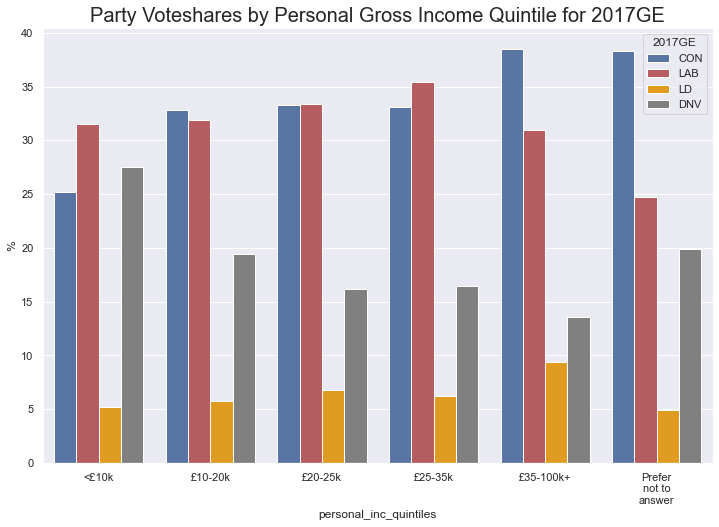

In [340]:
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}
GE_year = "2017GE"
ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year,fontsize=20);

In [341]:
ct = round(pd.crosstab(df["2019GE"].cat.remove_categories(drop_vote_categories),
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
ct

personal_inc_quintiles,<£10k,£10-20k,£20-25k,£25-35k,£35-100k+,Prefer\nnot to\nanswer
2019GE,,,,,,
BXP,1.6,2.0,2.0,1.4,0.8,1.5
CON,28.7,35.6,35.1,34.5,38.4,43.0
DK,1.1,0.9,0.8,0.7,0.6,3.1
GP,2.0,2.0,2.0,2.2,2.4,2.0
LAB,27.9,23.9,28.0,29.2,26.7,18.6
LD,7.9,8.3,8.8,10.2,14.6,6.9
OTH,1.0,1.2,1.0,1.0,0.8,1.1
PC,0.3,0.6,0.5,0.4,0.2,0.5
SNP,3.7,3.3,3.9,2.9,2.6,1.9


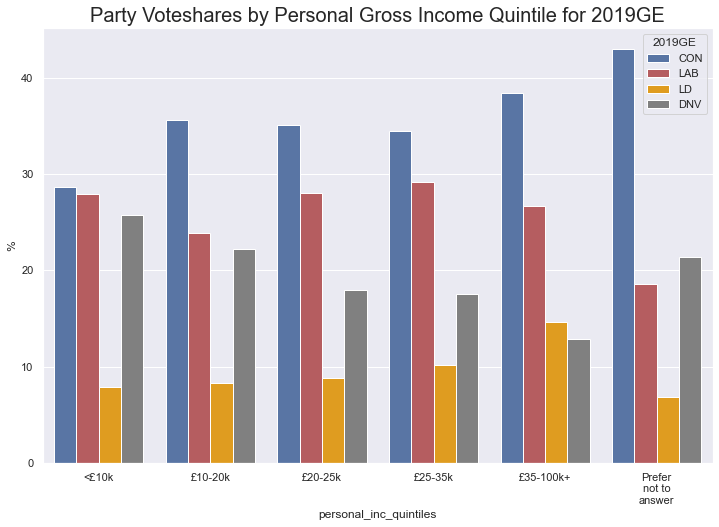

In [342]:
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}
GE_year = "2019GE"
ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year,fontsize=20);

In [343]:
ct = round(pd.crosstab(df["2015GE"].cat.remove_categories(drop_vote_categories),
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
ct

personal_inc_quintiles,<£10k,£10-20k,£20-25k,£25-35k,£35-100k+,Prefer\nnot to\nanswer
2015GE,,,,,,
BNP,0.1,0.1,0.2,0.1,0.0,0.0
CON,21.0,27.0,29.4,29.5,36.8,33.1
DK,2.4,1.9,1.6,1.8,1.5,6.0
GP,4.4,4.0,5.6,4.4,3.9,2.2
LAB,24.5,25.3,24.1,25.1,24.8,20.2
LD,5.7,6.6,7.1,7.5,8.8,5.8
OTH,1.1,1.1,1.1,1.3,0.9,1.8
PC,0.4,0.4,0.3,0.3,0.2,0.4
SNP,3.5,3.5,4.0,2.9,2.5,2.0


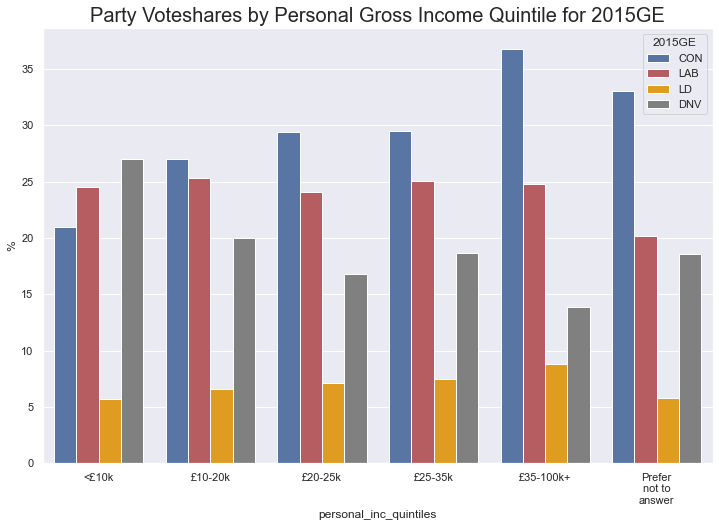

In [344]:
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}
GE_year = "2015GE"
ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year,fontsize=20);

In [345]:
GE_year = "2010GE"

ct = round(pd.crosstab(df[GE_year].cat.remove_categories(drop_vote_categories),
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
ct

personal_inc_quintiles,<£10k,£10-20k,£20-25k,£25-35k,£35-100k+,Prefer\nnot to\nanswer
2010GE,,,,,,
BNP,1.4,1.0,0.6,0.9,0.7,0.6
CON,25.1,28.3,30.5,30.0,35.4,34.7
DK,4.4,4.4,3.7,3.0,2.5,7.4
GP,1.9,1.8,1.2,1.4,1.2,1.3
LAB,21.2,21.4,20.9,19.3,20.2,17.2
LD,17.0,17.9,19.1,19.8,21.1,15.0
OTH,0.9,0.8,0.8,0.7,0.8,1.5
PC,0.4,0.5,0.7,0.6,0.3,0.4
SNP,2.6,2.4,2.4,2.2,1.7,1.3


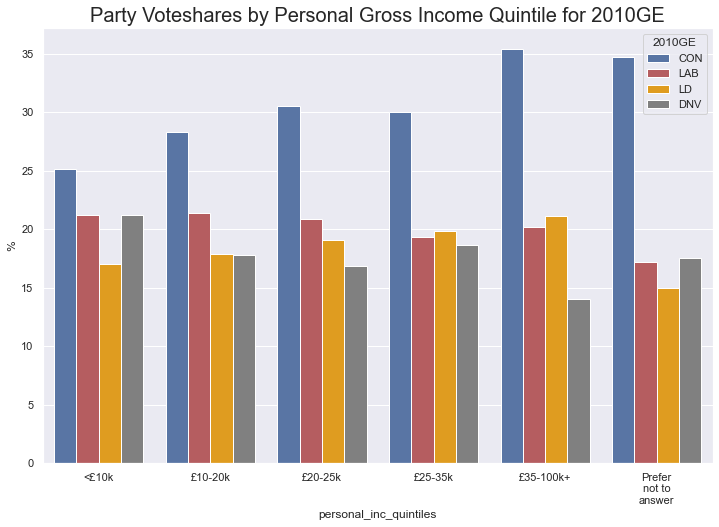

In [346]:
party_list = ["CON","LAB","DNV","LD"]

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette={"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'});
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year,fontsize=20);

In [347]:
GE_year = "2005GE"

ct = round(pd.crosstab(df[GE_year].cat.remove_categories(drop_vote_categories),
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
ct

personal_inc_quintiles,<£10k,£10-20k,£20-25k,£25-35k,£35-100k+,Prefer\nnot to\nanswer
2005GE,,,,,,
BNP,0.6,0.6,0.2,0.4,0.3,0.6
CON,20.8,24.6,25.3,26.4,29.6,29.3
DK,8.6,7.9,7.1,6.6,4.8,14.5
GP,2.3,1.7,1.7,1.7,1.5,1.1
LAB,25.7,26.5,27.7,23.6,25.1,22.2
LD,12.5,13.7,13.9,14.0,15.7,8.9
OTH,1.0,0.7,0.5,1.2,0.7,1.2
PC,0.4,0.4,0.7,0.5,0.2,0.3
SNP,2.2,2.0,1.6,1.9,1.6,0.9


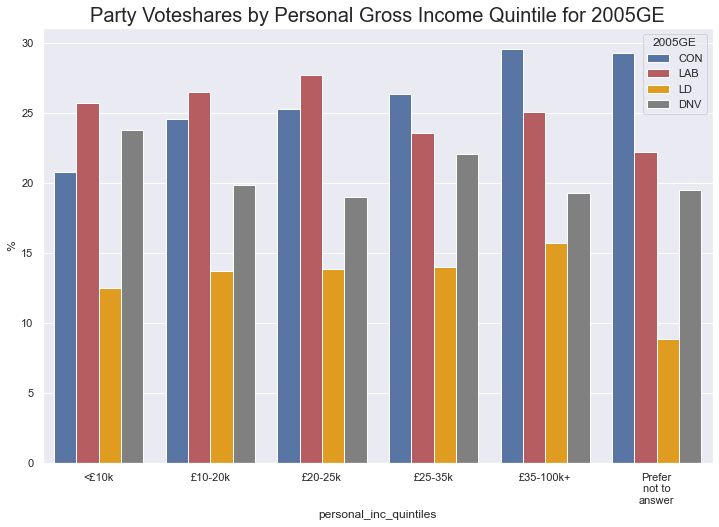

In [348]:
party_list = ["CON","LAB","DNV","LD"]

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette={"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'});
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year,fontsize=20);

In [ ]:
### using W1 personal income 

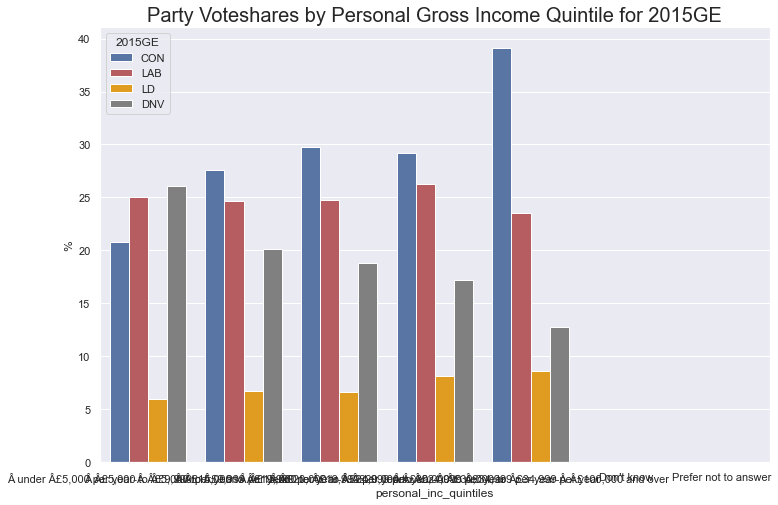

In [429]:
GE_year = "2015GE"
ct = round(pd.crosstab(df[GE_year].cat.remove_categories(drop_vote_categories),
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year,fontsize=20);


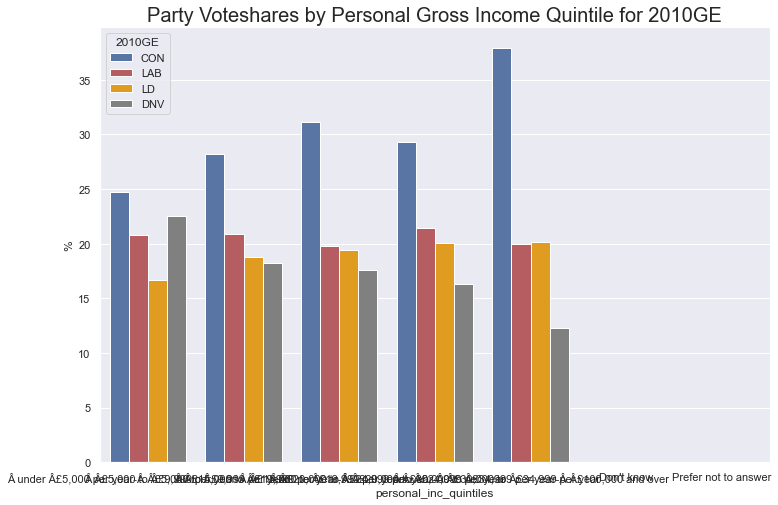

In [430]:
GE_year = "2010GE"
ct = round(pd.crosstab(df[GE_year].cat.remove_categories(drop_vote_categories),
                  df["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year,fontsize=20);


In [ ]:
## bleurgh - as expect, using the W1 income variable ... changed nothing significant

In [ ]:
## quick poor-man's-control on Age

In [8]:
# df

In [529]:
df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
age_cats = [0,1,2,3]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask.sum()

13950

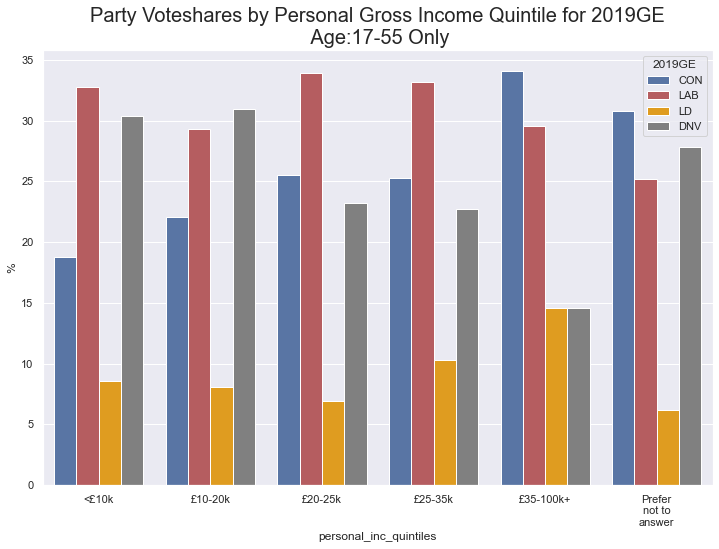

In [530]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask]["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


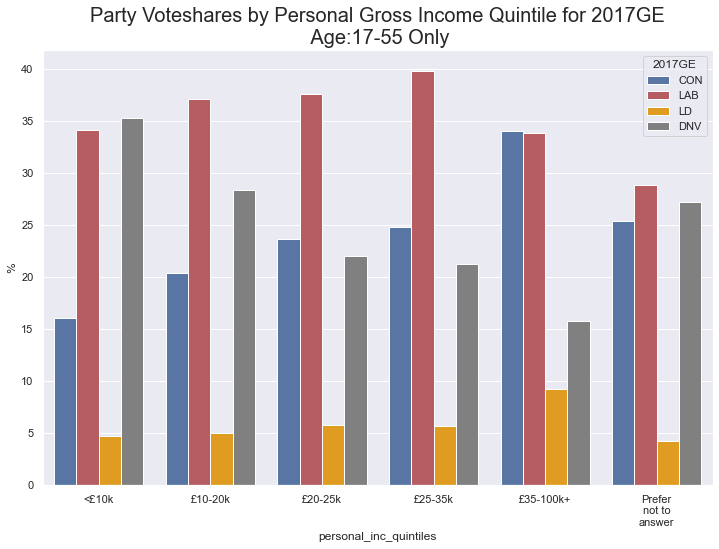

In [519]:
GE_year = "2017GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask]["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


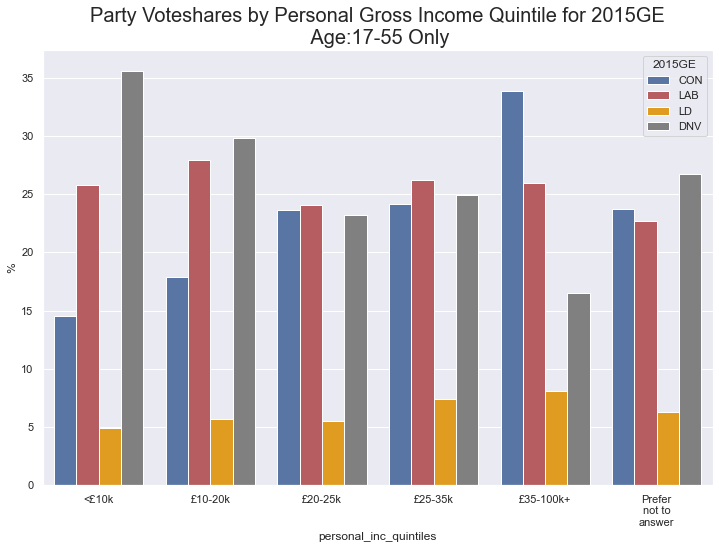

In [520]:
GE_year = "2015GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask]["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


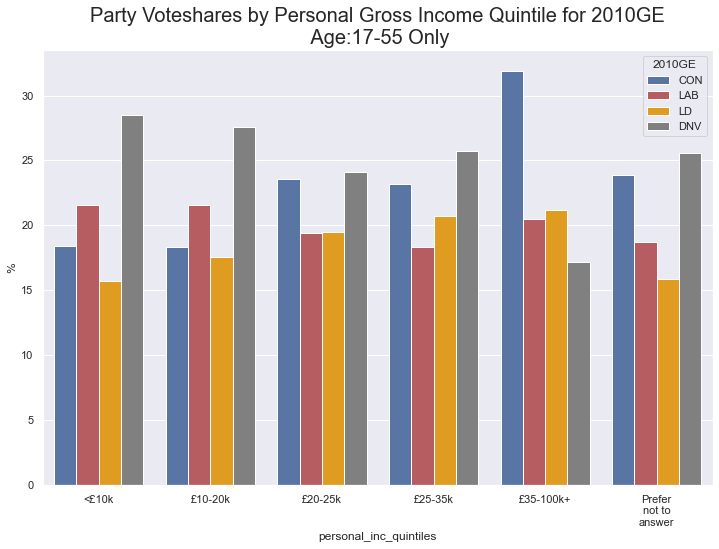

In [521]:
GE_year = "2010GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask]["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


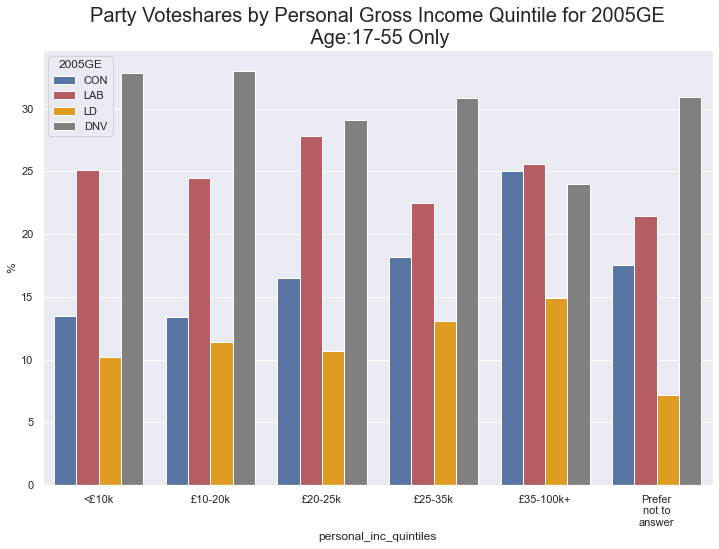

In [522]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask]["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


In [523]:
age_cats = [4,5,6]
age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask.sum()

18227

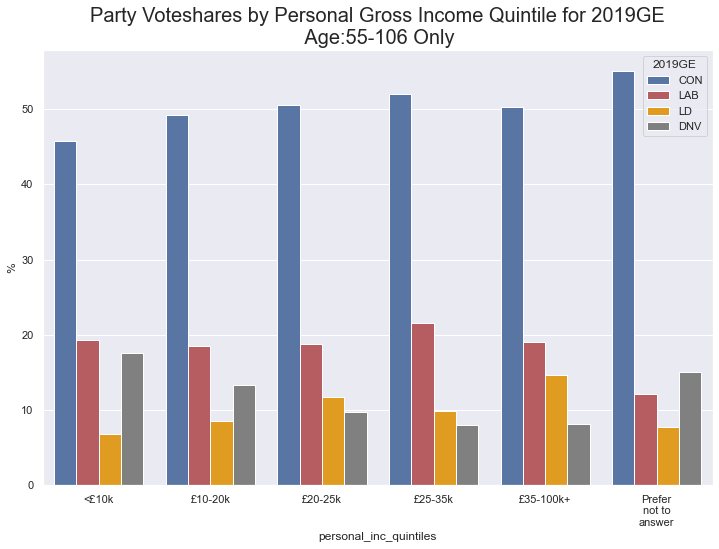

In [524]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask]["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


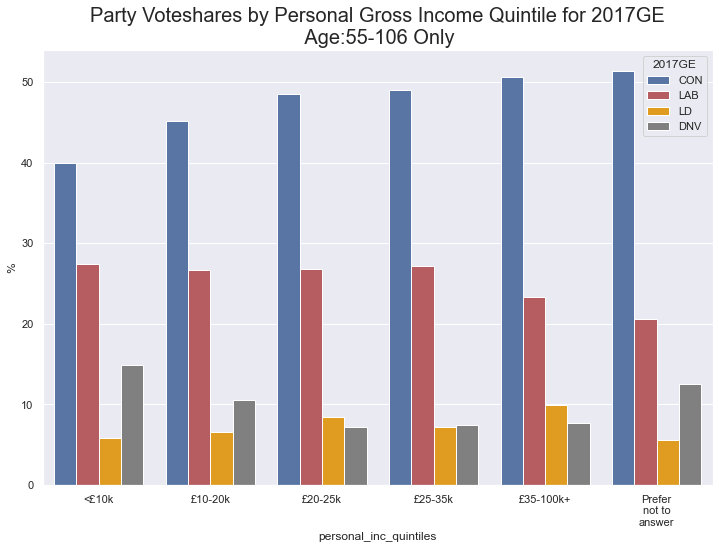

In [525]:
GE_year = "2017GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask]["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


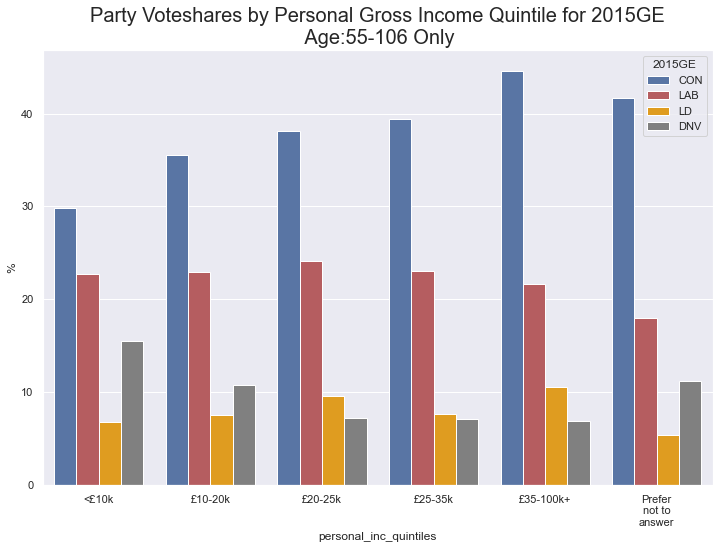

In [526]:
GE_year = "2015GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask]["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


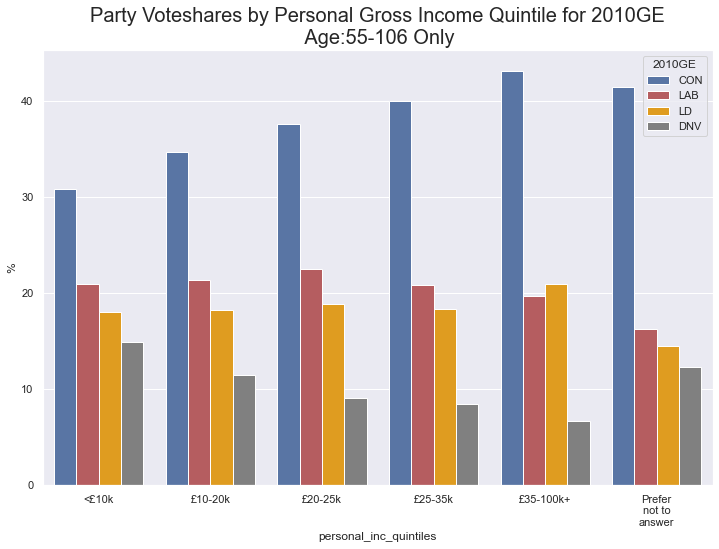

In [527]:
GE_year = "2010GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask]["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


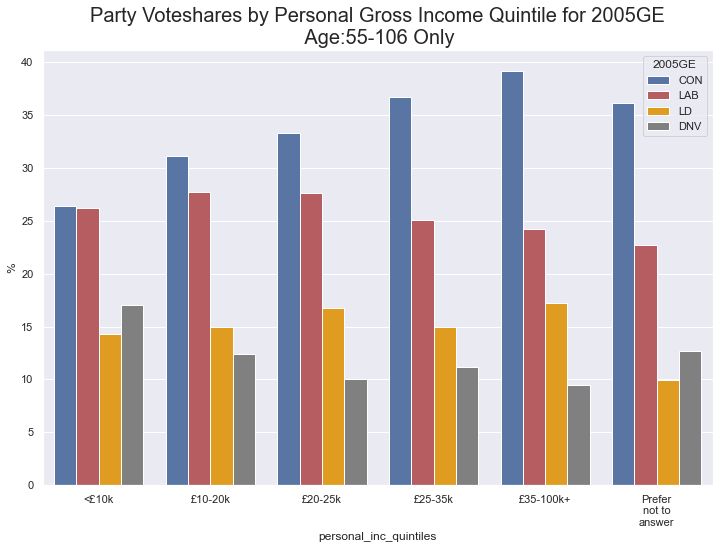

In [528]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask]["personal_inc_quintiles"], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = "personal_inc_quintiles",y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Personal Gross Income Quintile for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


In [ ]:
#### So I think this answers the question about "income Con-Lab realignment"
#### But what about "class"?
#  "profile_socialgrade_cie","subjClass","ns_sec","ns_sec_analytic"

In [48]:
BES_Panel["profile_socialgrade_cie"].value_counts().sort_index()

a     5006
b     6914
C1    8324
C2    4823
d     3067
e     4043
Name: profile_socialgrade_cie, dtype: int64

In [21]:
x_var = "profile_socialgrade_cie"
drop_vote_categories = ["TYTV(Def)","TYTV(Maybe)","UNK"]

In [41]:
df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
age_cats = [0,1,2,3,4,5,6]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask.sum()

32177

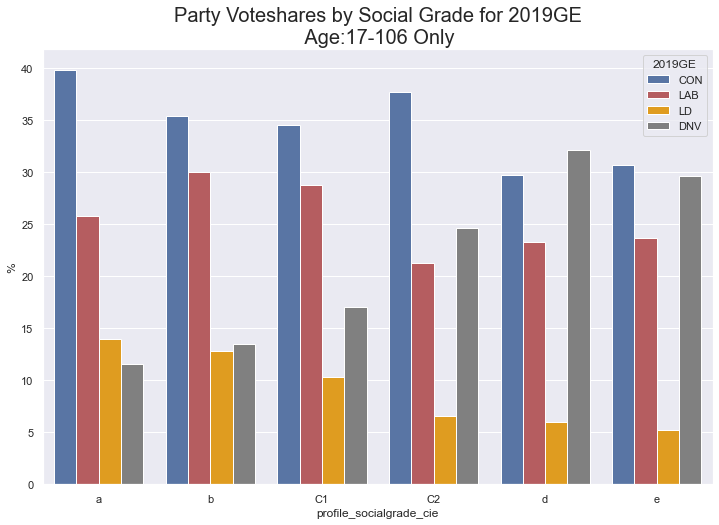

In [46]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


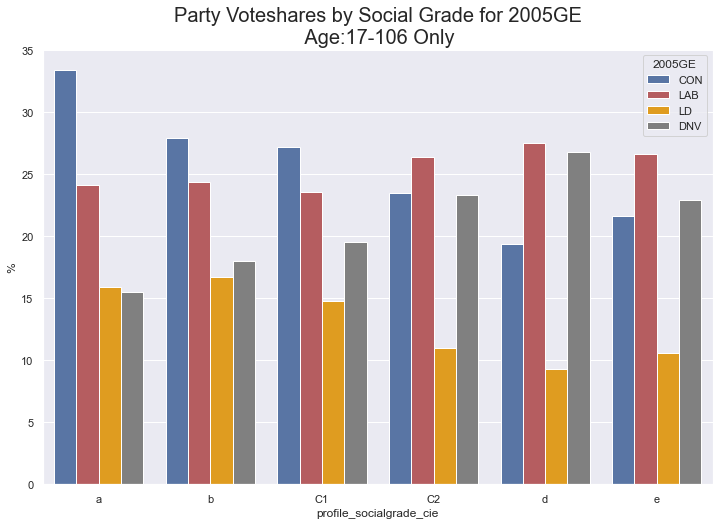

In [44]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


In [33]:
df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
age_cats = [0,1,2,3]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask.sum()

13950

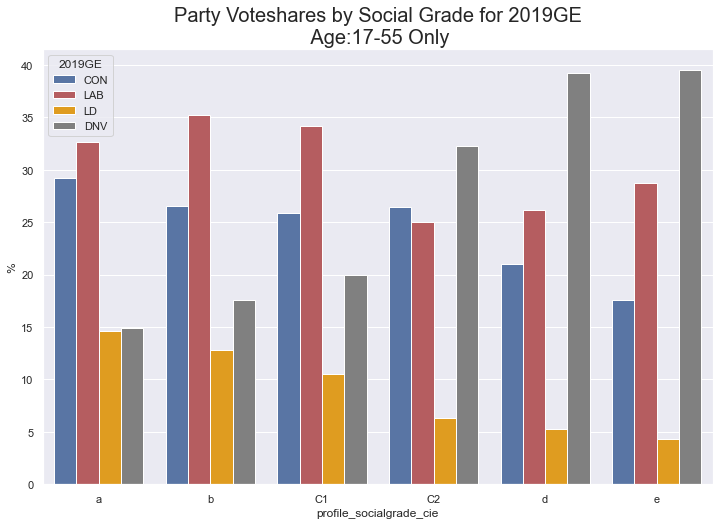

In [34]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


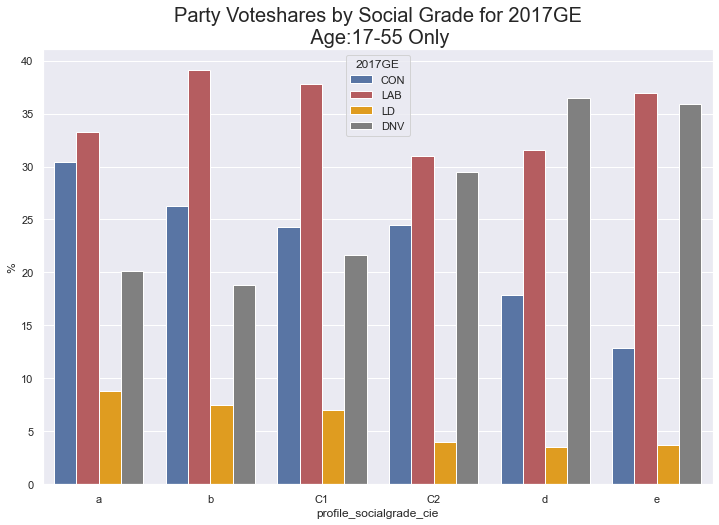

In [35]:
GE_year = "2017GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


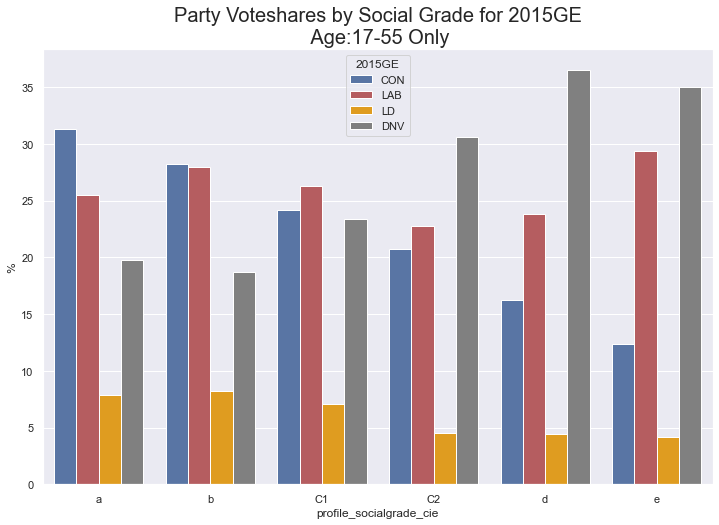

In [24]:
GE_year = "2015GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


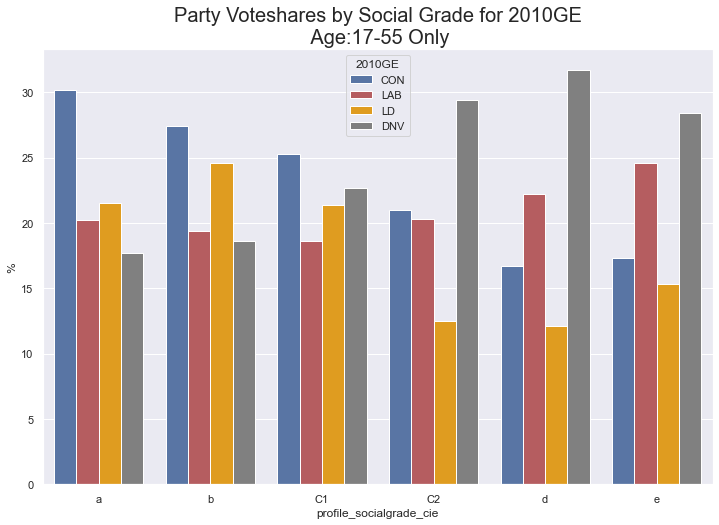

In [26]:
GE_year = "2010GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


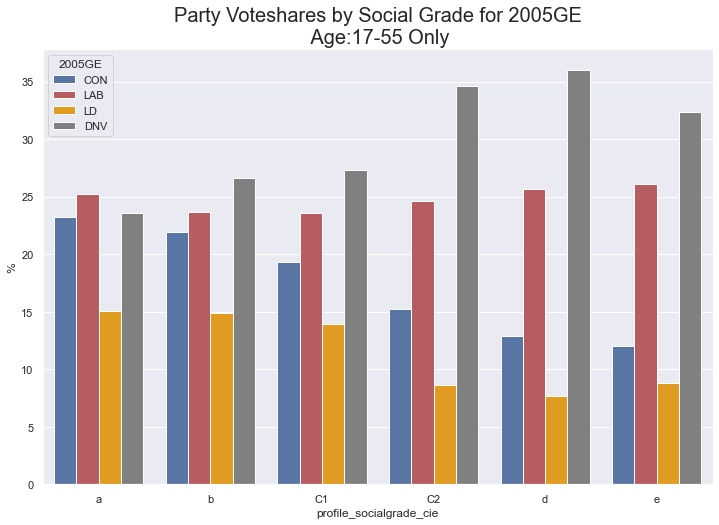

In [25]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


In [38]:
df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
age_cats = [4,5,6]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask.sum()

18227

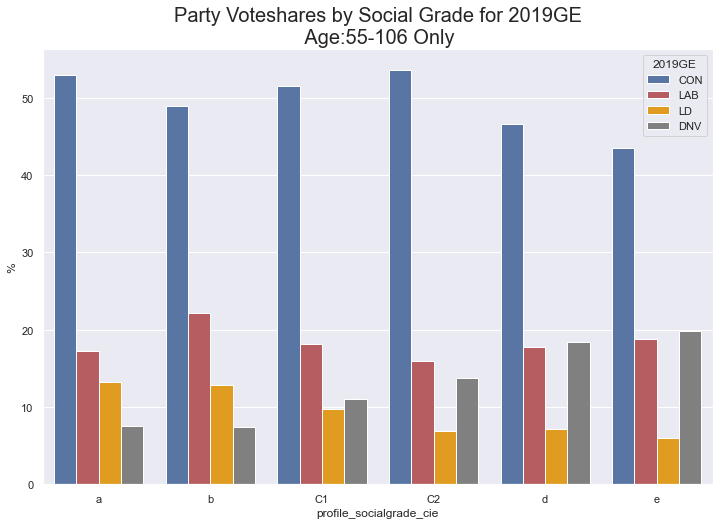

In [39]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


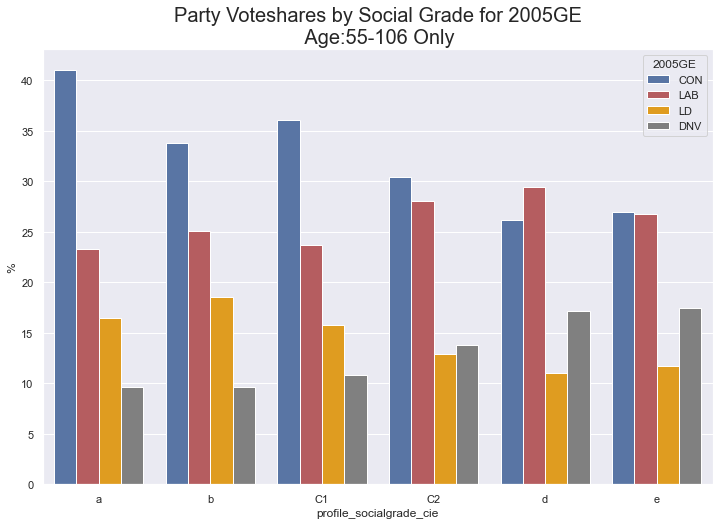

In [40]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


In [50]:
x_var = "subjClass"

In [51]:
df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
age_cats = [0,1,2,3]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask.sum()

13950

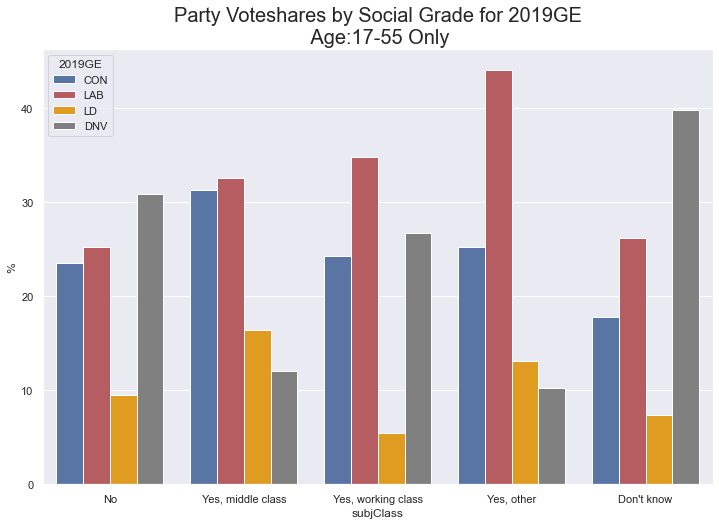

In [52]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


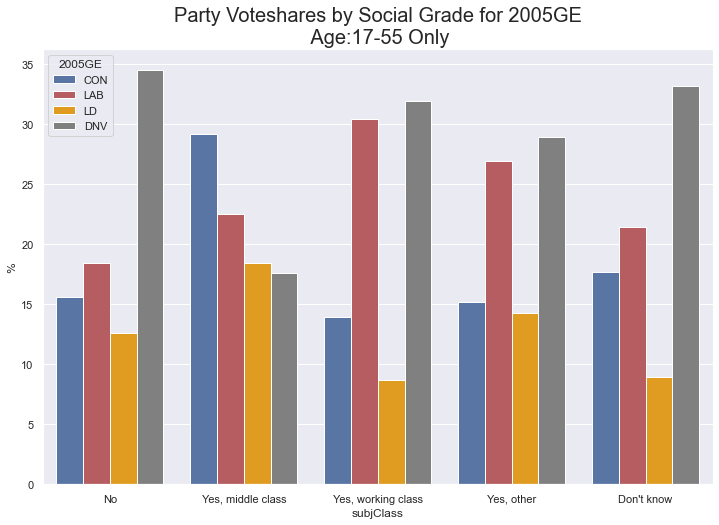

In [53]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


In [54]:
df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
age_cats = [4,5,6]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask.sum()

18227

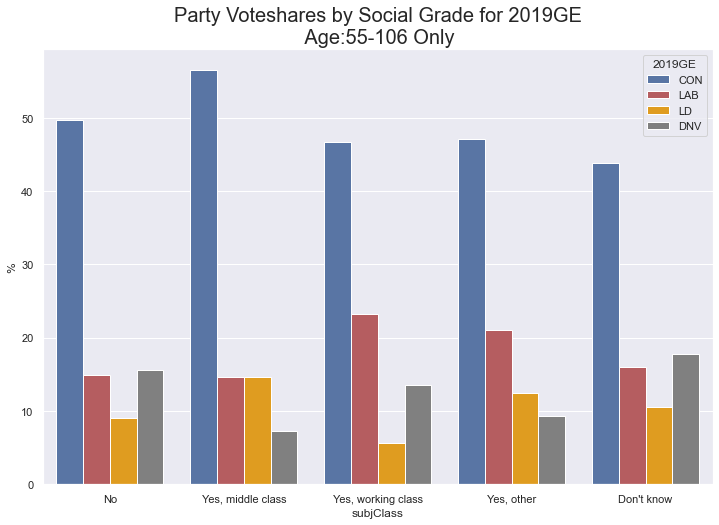

In [55]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


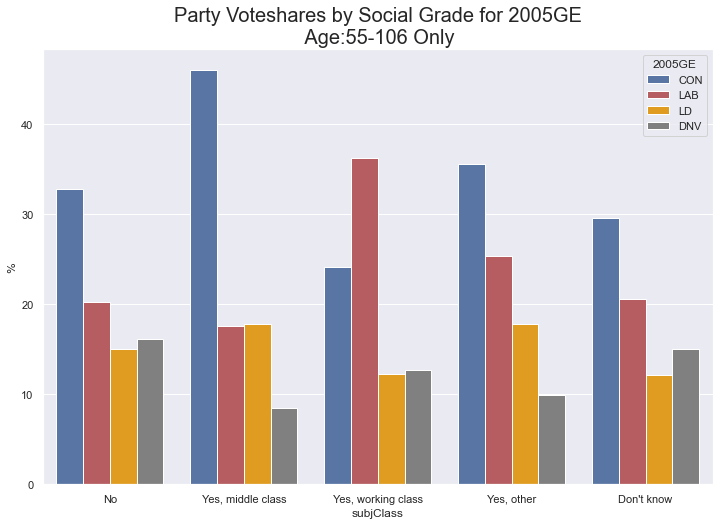

In [56]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


In [60]:
df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
age_cats = [2]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask.sum()

3911

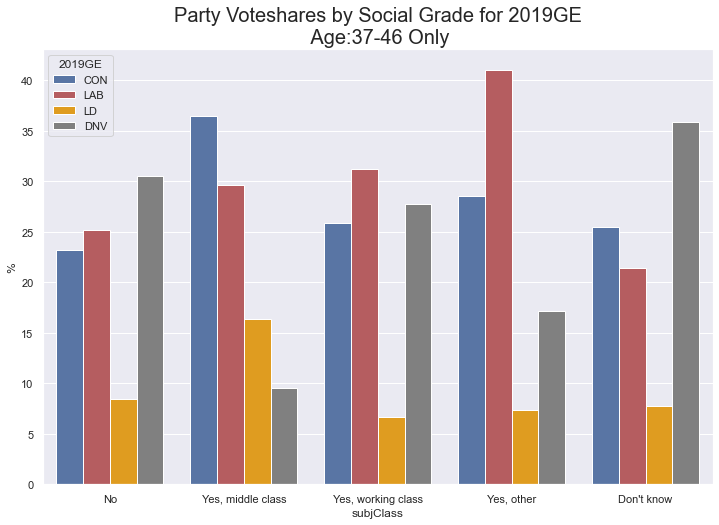

In [61]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


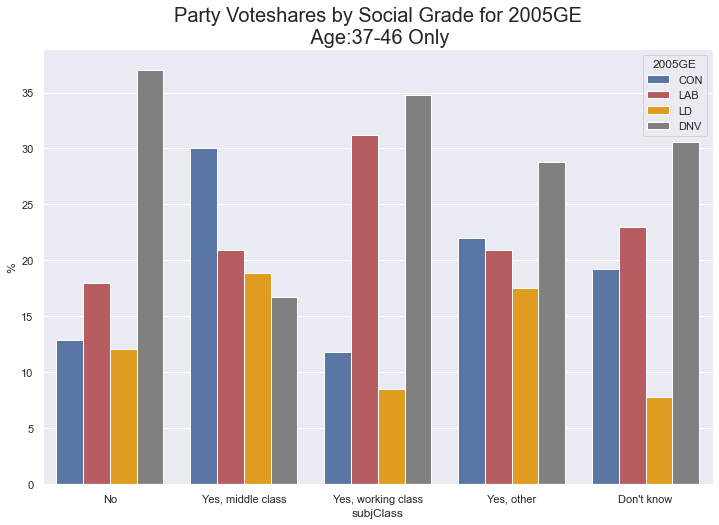

In [62]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);


In [63]:
x_var = "ns_sec_analytic"

In [64]:
df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
age_cats = [0,1,2,3]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask.sum()

13950

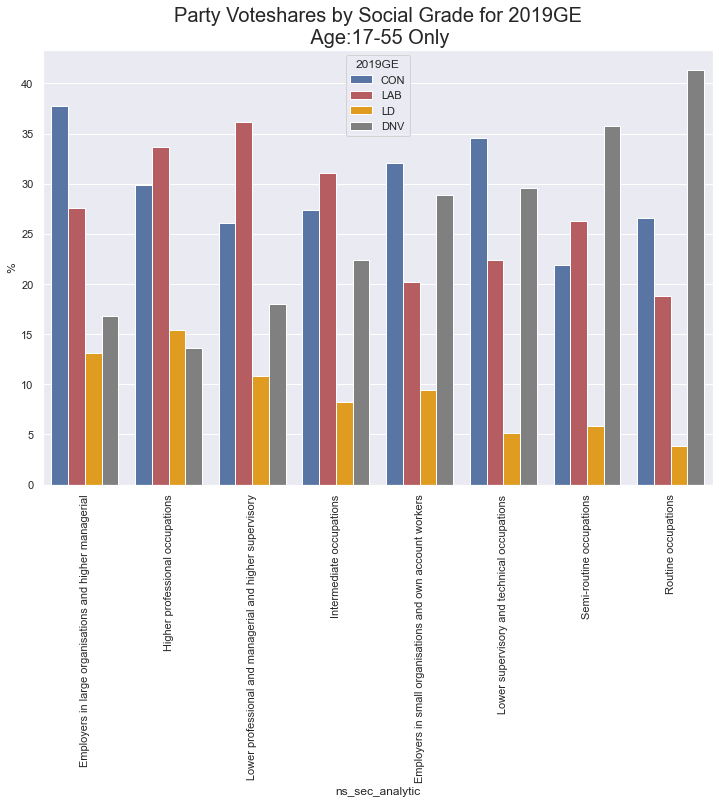

In [69]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);

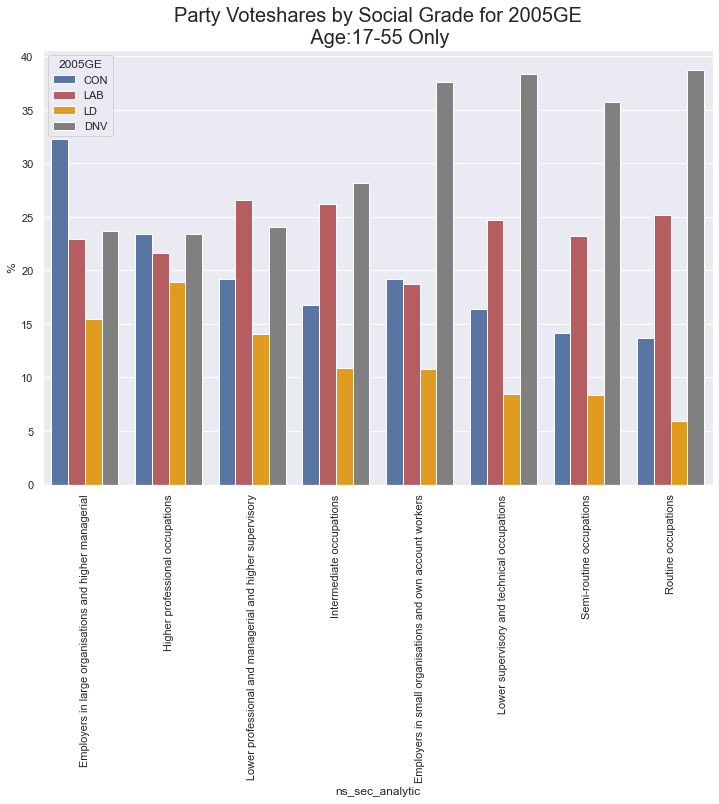

In [68]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);

In [70]:
df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
age_cats = [4,5,6]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask.sum()

18227

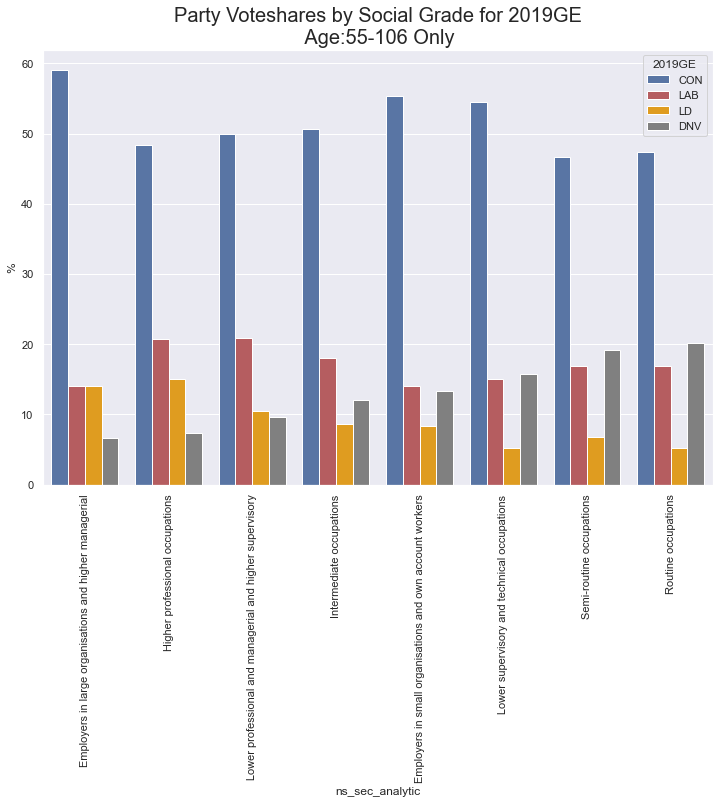

In [71]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);

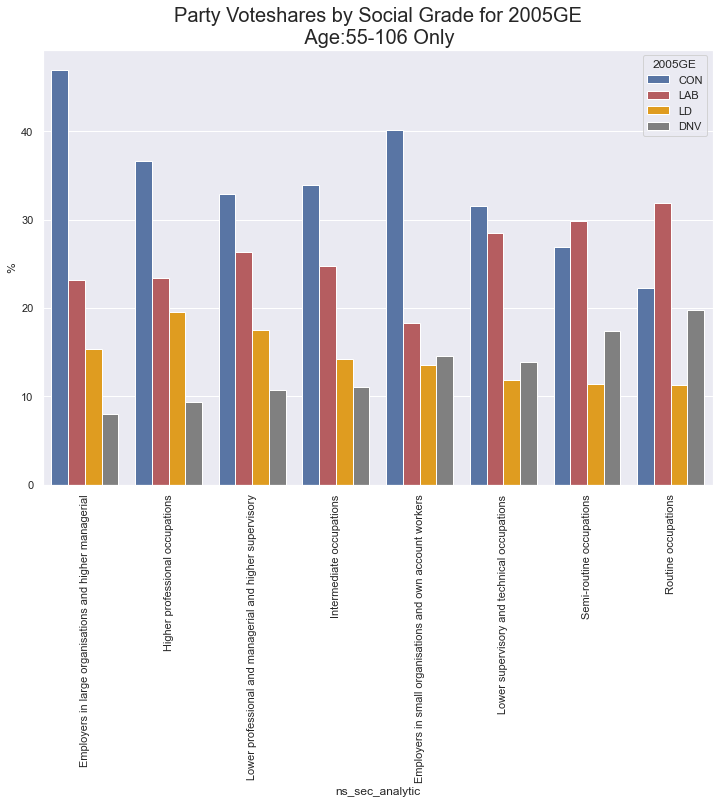

In [72]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);

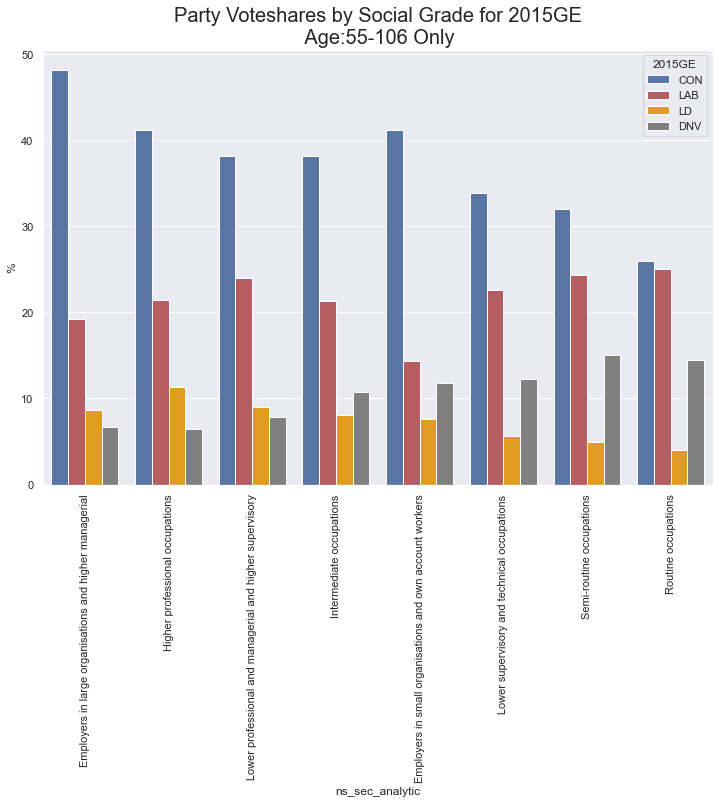

In [73]:
GE_year = "2015GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);

In [82]:
x_var = "profile_socialgrade_cie"
drop_vote_categories = ["TYTV(Def)","TYTV(Maybe)","UNK",'DK',"PC","SNP",]
country_mask = df["country"]=="England"

In [100]:
ylim=[0,60]

In [107]:
# df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
age_cats = [4,5,6]
age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask = mask&country_mask
age_str = age_str+"(in 2019) and England"

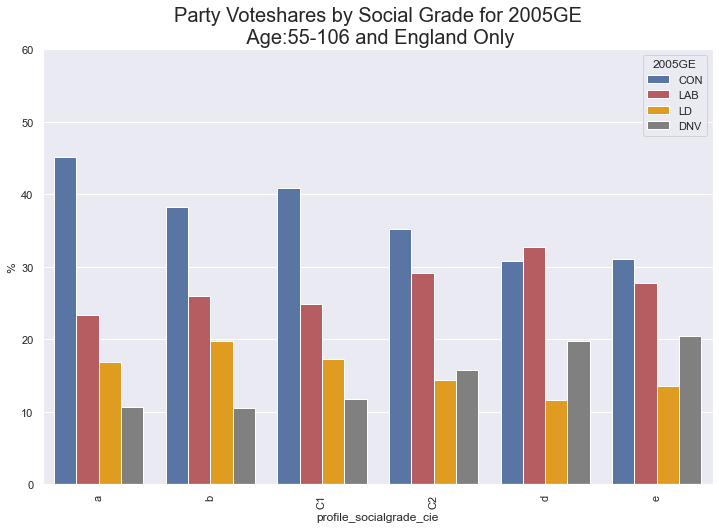

In [108]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

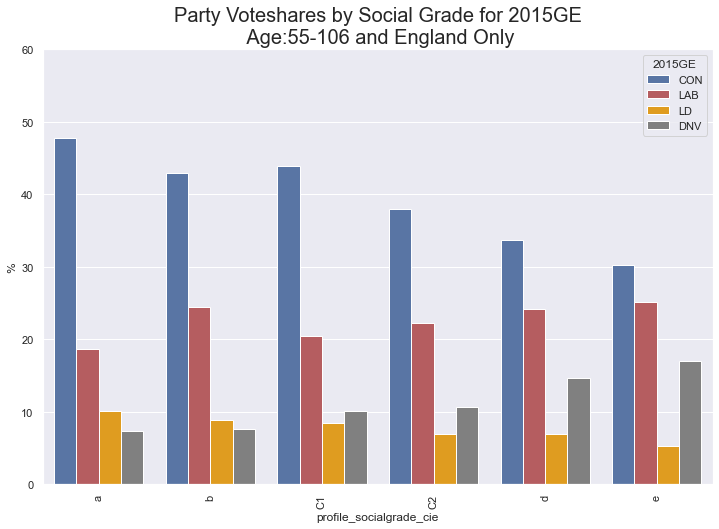

In [109]:
GE_year = "2015GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

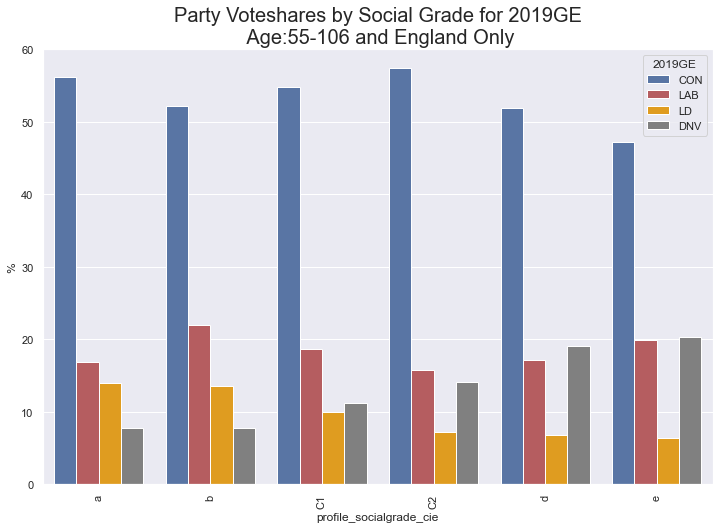

In [110]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

In [111]:

age_cats = [0,1,2,3]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask = mask&country_mask
age_str = age_str+" and England"

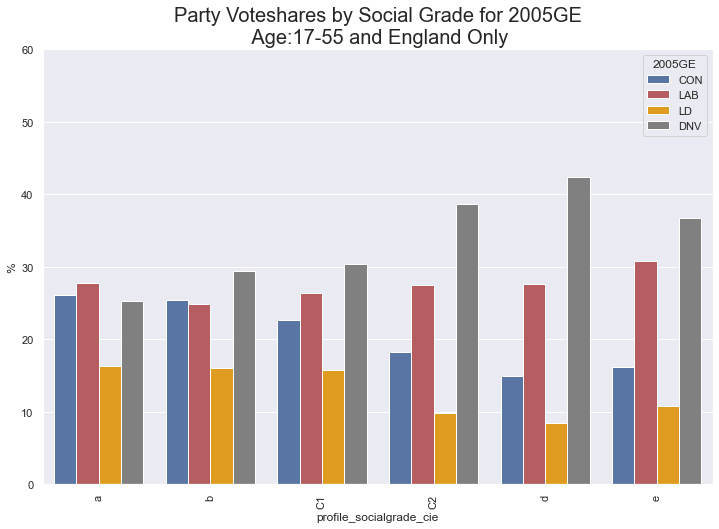

In [112]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

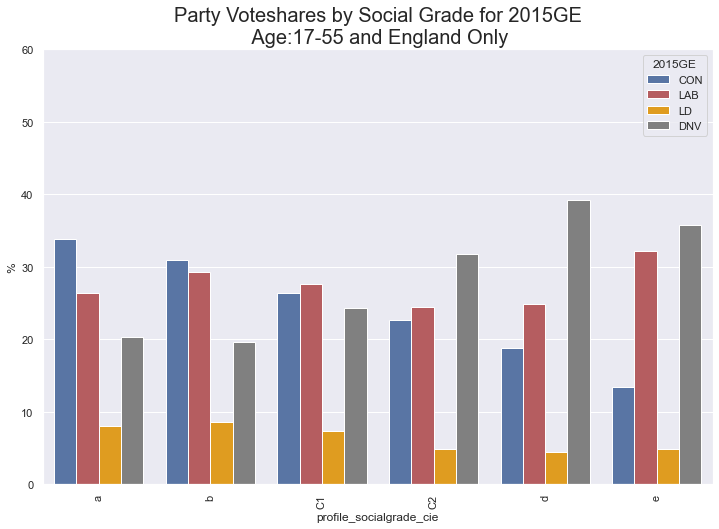

In [113]:
GE_year = "2015GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

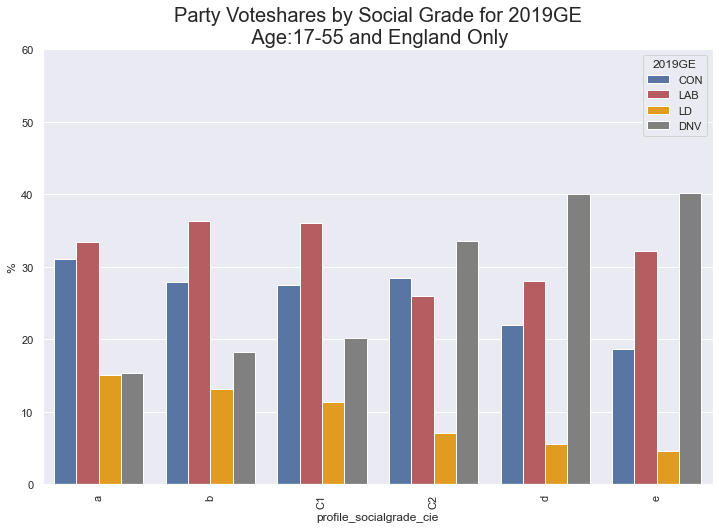

In [114]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

In [115]:
x_var = "ns_sec_analytic"
drop_vote_categories = ["TYTV(Def)","TYTV(Maybe)","UNK",'DK',"PC","SNP",]
country_mask = df["country"]=="England"

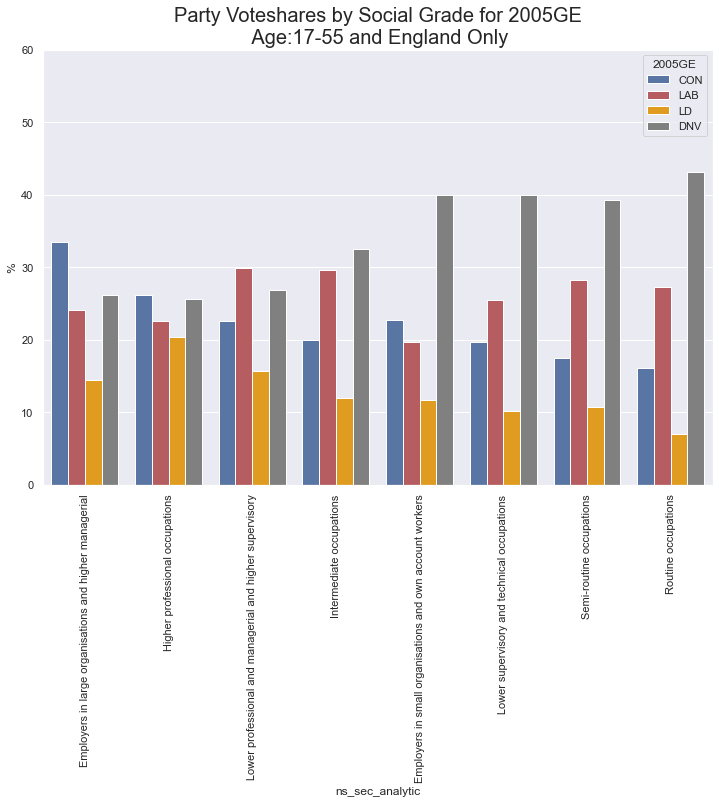

In [116]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

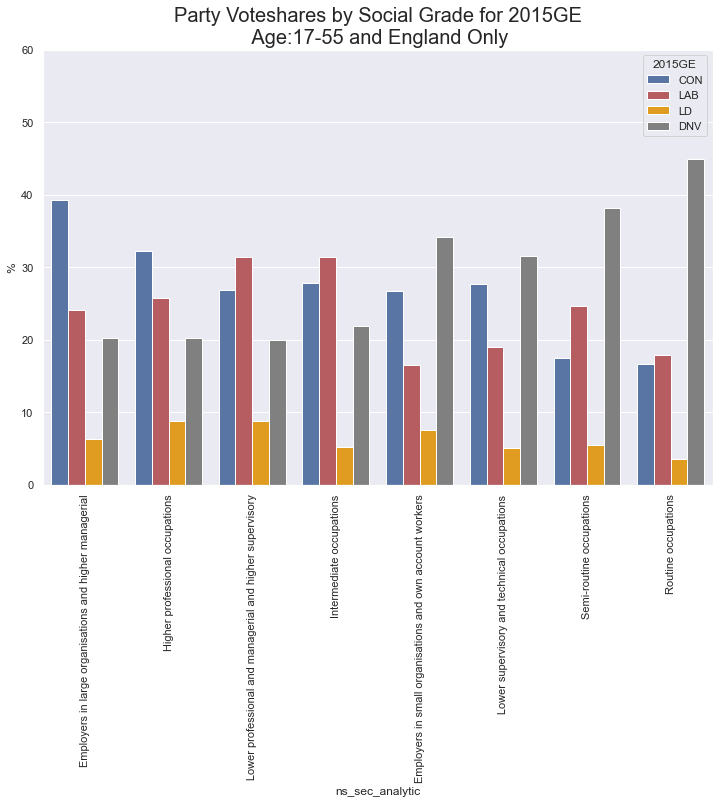

In [117]:
GE_year = "2015GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

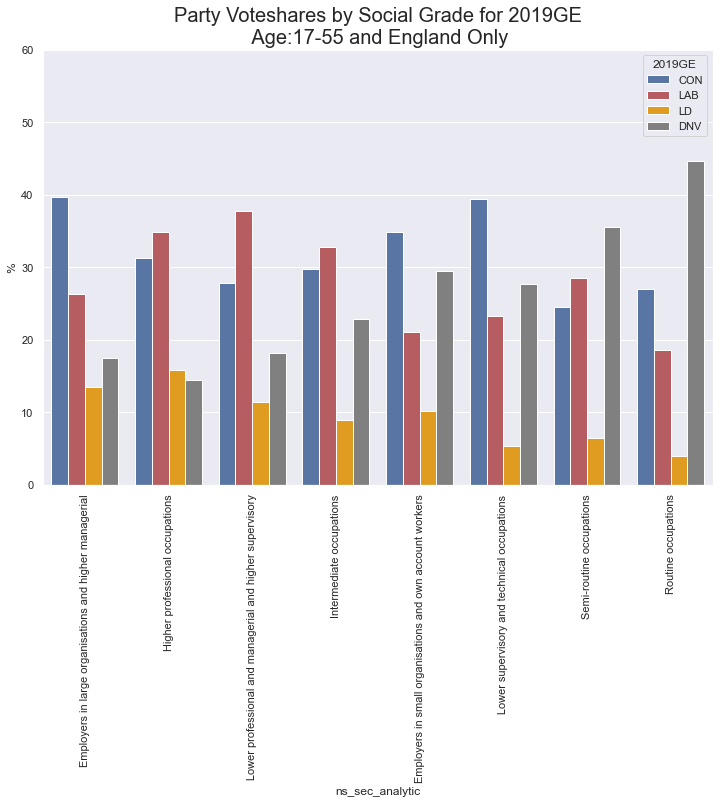

In [118]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

In [136]:
x_var = "house_tenure"
drop_vote_categories = ["TYTV(Def)","TYTV(Maybe)","UNK",'DK',"PC","SNP",]
country_mask = df["country"]=="England"

In [137]:

age_cats = [0,1,2,3]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask = mask&country_mask
age_str = age_str+" and England"

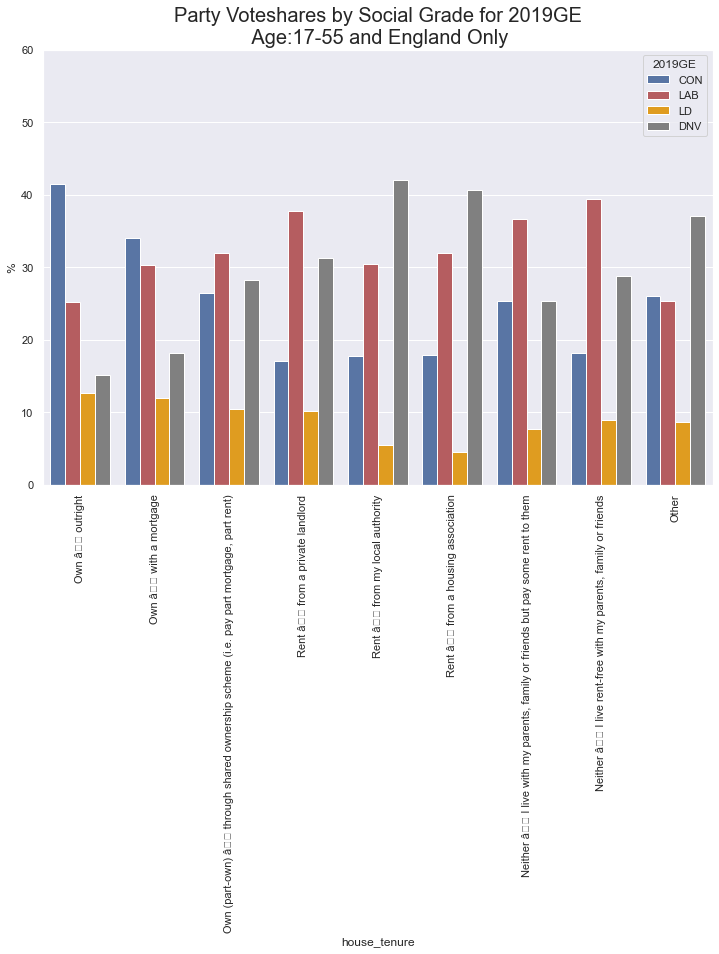

In [138]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

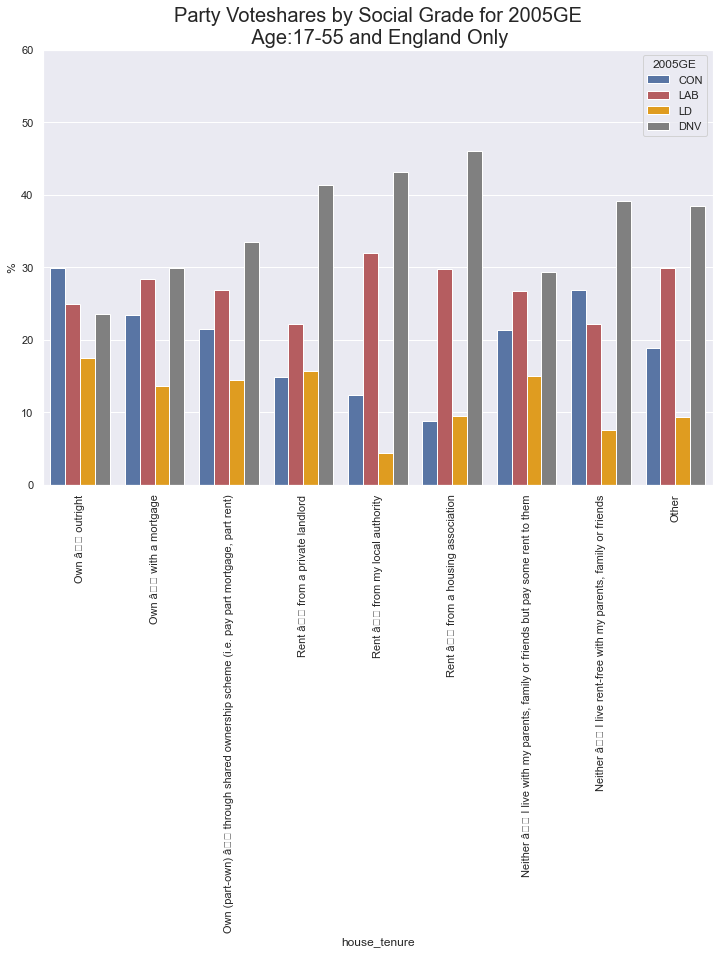

In [139]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

In [140]:

age_cats = [4,5,6]

age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
age_str

mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
mask = mask&country_mask
age_str = age_str+" and England"

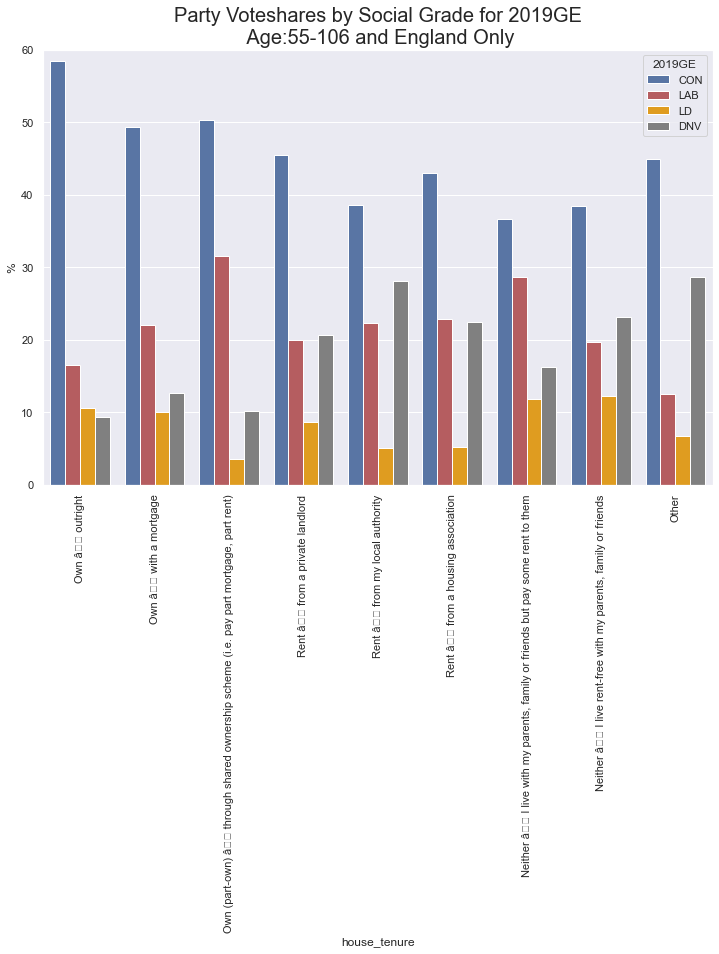

In [141]:
GE_year = "2019GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

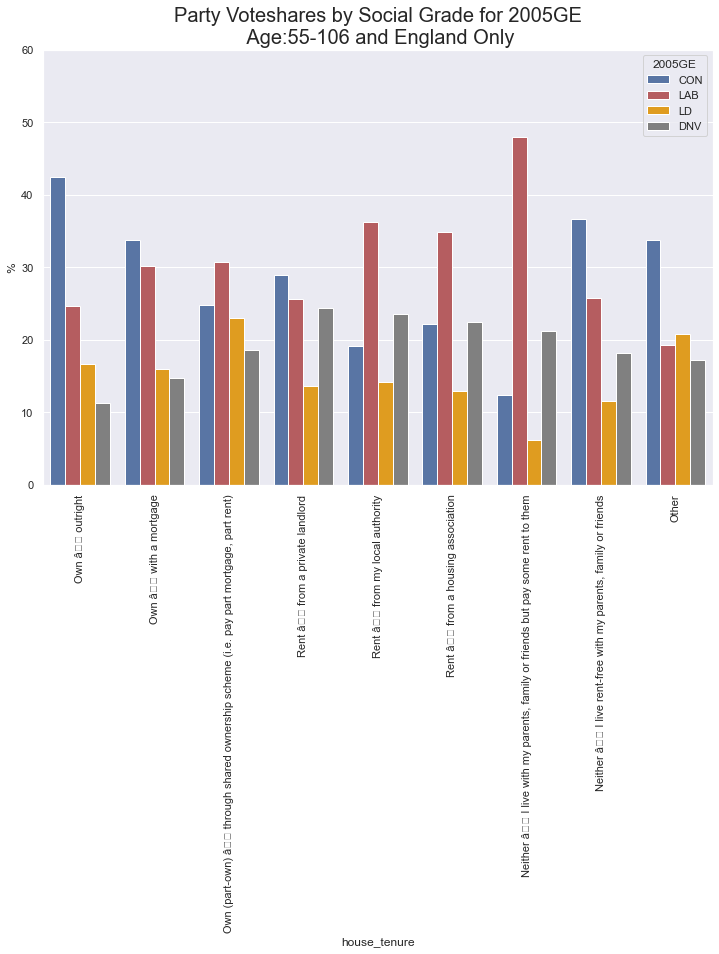

In [142]:
GE_year = "2005GE"
ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                  df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}

ct = ct.loc[party_list].stack().reset_index(name="%")
ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

plt.figure(figsize=(12,8));
sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
plt.title("Party Voteshares by Social Grade for "+GE_year+"\n Age:"+age_str+" Only",fontsize=20);
plt.xticks(rotation=90);
plt.ylim(ylim);

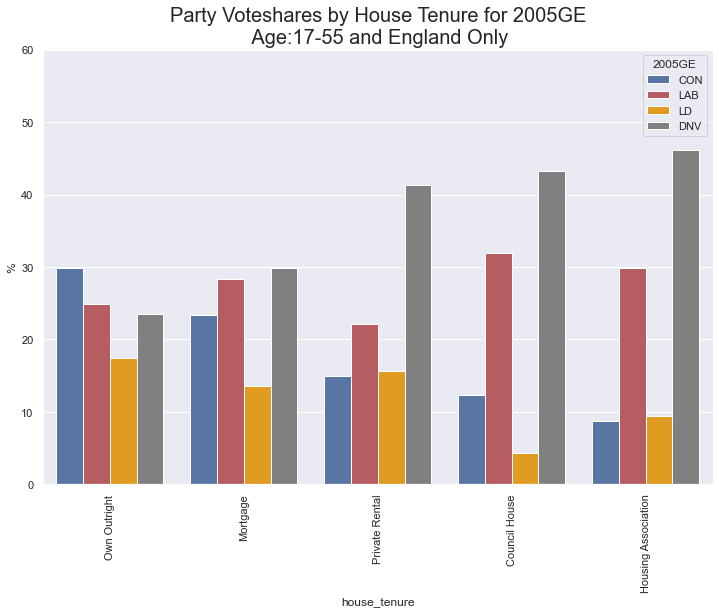

In [245]:
def get_mask(age_cats):
    age_str = str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[min(age_cats)].left))+"-"+str(int(pan_dataset_ages["equalisedAgeGroup_at_W19"].cat.categories[max(age_cats)].right))
    mask = df["equalisedAgeGroup_at_W19"].isin(df["equalisedAgeGroup_at_W19"].cat.categories[age_cats])
    mask = mask&country_mask
    age_str = age_str+country_name
    return mask,age_str

def voteshare_split(GE_year,age_cats,title_font=20,xtick_rot = 0,ylim=(0,None),figsize=(12,8)):

    ct = round(pd.crosstab(df[mask][GE_year].cat.remove_categories(drop_vote_categories),
                      df[mask][x_var], values=df["wt"],aggfunc=sum,normalize='columns')*100,1)

    ct = ct.loc[party_list].stack().reset_index(name="%")
    ct[GE_year] = ct[GE_year].cat.remove_unused_categories()

    plt.figure(figsize=figsize);
    sns.barplot(data=ct,x = x_var,y="%",hue=GE_year,palette=palette);
    title = "Party Voteshares by "+x_name+" for "+GE_year+"\n Age:"+mask_str+" Only"
    plt.title(title,fontsize=title_font);
    plt.xticks(rotation=xtick_rot);
    plt.ylim(ylim); 
    


drop_vote_categories = ["TYTV(Def)","TYTV(Maybe)","UNK",'DK',"PC","SNP",]
country_mask = df["country"]=="England"
country_name =" and England"
party_list = ["CON","LAB","DNV","LD"]
palette = {"CON":'b',"LAB":'r',"DNV":'grey',"LD":'orange'}    

x_var = "house_tenure"
x_name = "House Tenure"

GE_year = "2005GE"
age_cats = [0,1,2,3]

mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

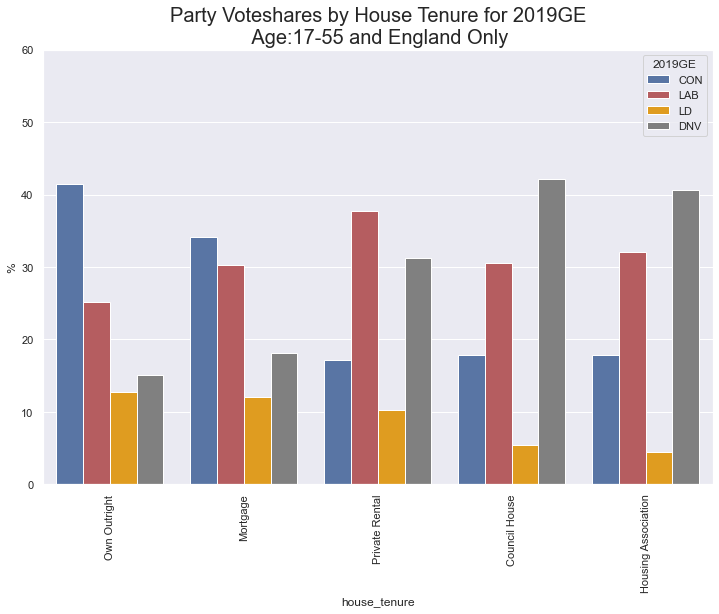

In [198]:
GE_year = "2019GE"
age_cats = [0,1,2,3]
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

In [166]:
low_freq_options = list(df["house_tenure"].value_counts()[df["house_tenure"].value_counts()<1000].index)
df["house_tenure"] = df["house_tenure"].cat.remove_categories(low_freq_options).cat.remove_unused_categories()
df["house_tenure"] = df["house_tenure"].cat.rename_categories(["Own Outright", 'Mortgage', 'Private Rental', 'Council House', 'Housing Association'])

In [174]:
low_freq_options = list(df["subjClass"].value_counts()[df["subjClass"].value_counts()<1400].index)
df["subjClass"] = df["subjClass"].cat.remove_categories(low_freq_options).cat.remove_unused_categories()
df["subjClass"] = df["subjClass"].cat.rename_categories(["No Class Id","Middle Class Id","Working Class Id"])

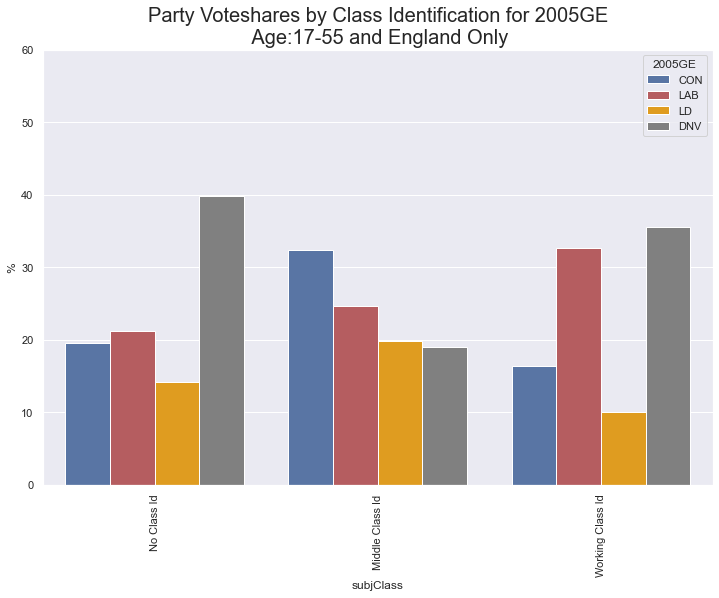

In [199]:
x_var = "subjClass"
x_name = "Class Identification"

GE_year = "2005GE"
age_cats = [0,1,2,3]

voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

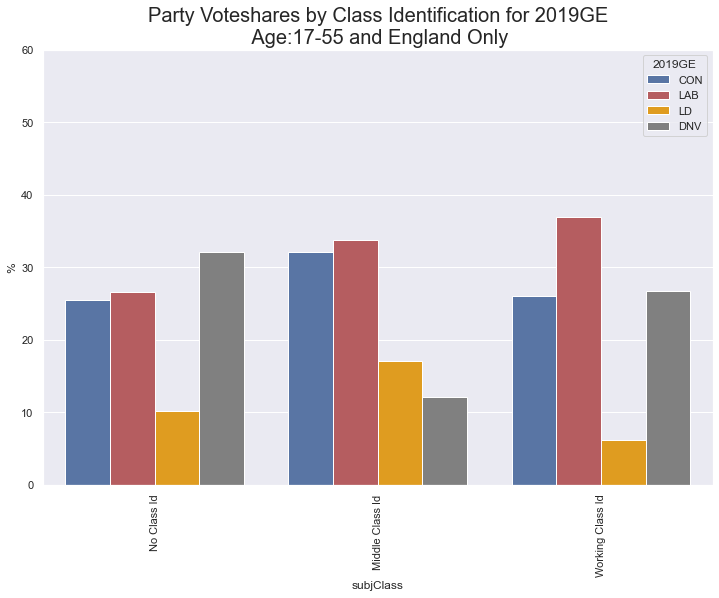

In [200]:
x_var = "subjClass"
x_name = "Class Identification"

GE_year = "2019GE"
age_cats = [0,1,2,3]

voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

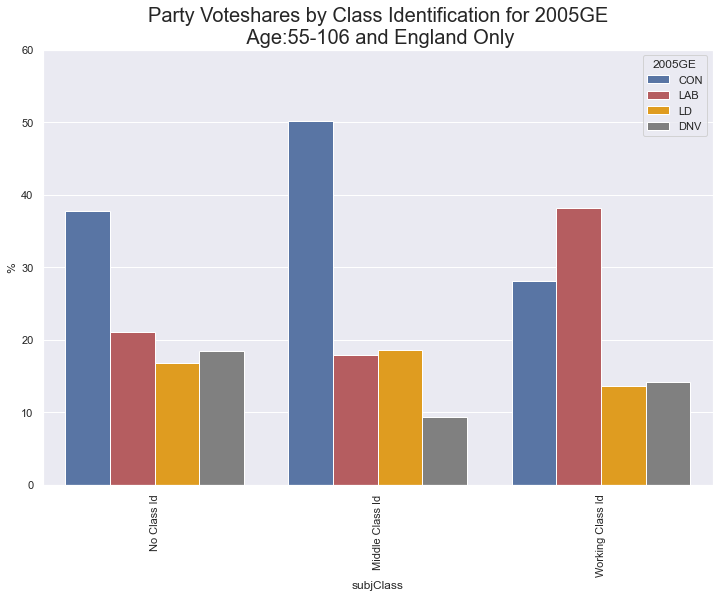

In [201]:
x_var = "subjClass"
x_name = "Class Identification"

GE_year = "2005GE"
age_cats = [4,5,6]

voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

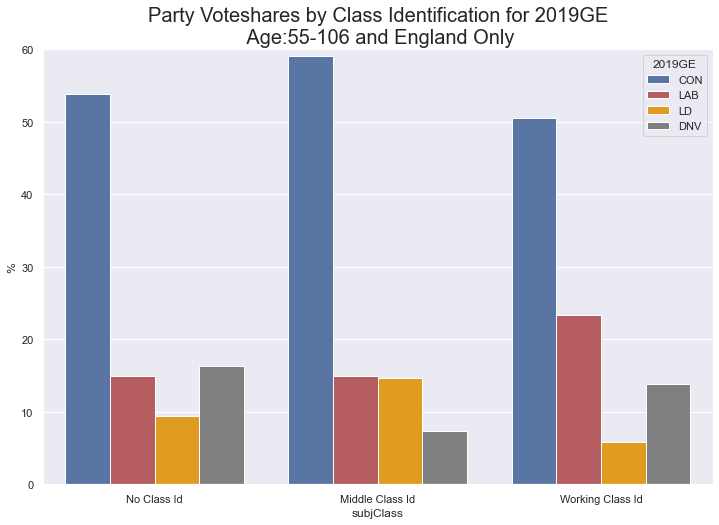

In [203]:
x_var = "subjClass"
x_name = "Class Identification"

GE_year = "2019GE"
age_cats = [4,5,6]

voteshare_split(GE_year,age_cats,xtick_rot=0,ylim=ylim)

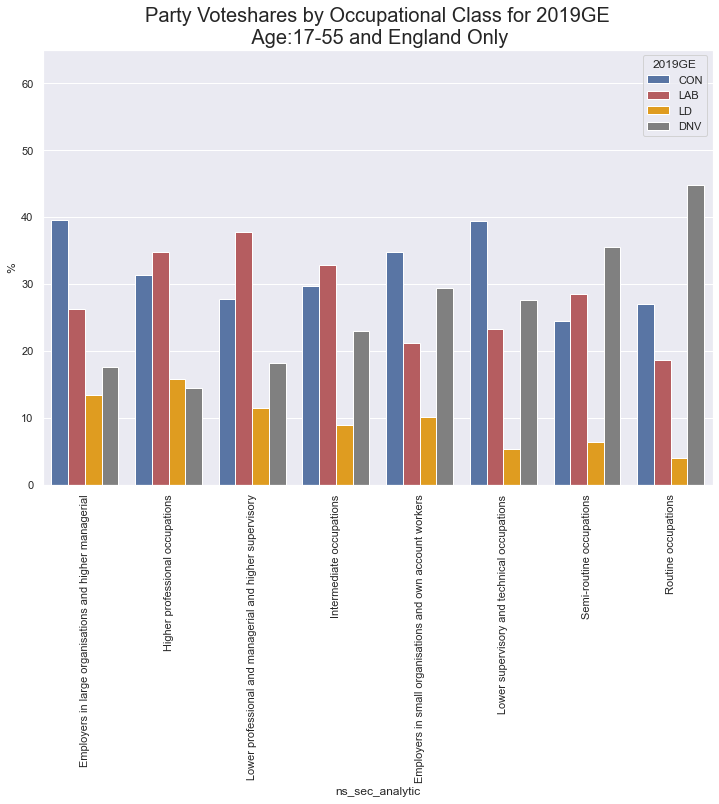

In [257]:
x_var = "ns_sec_analytic"
x_name = "Occupational Class"
ylim=(0,65)

GE_year = "2019GE"
age_cats = [0,1,2,3]
mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

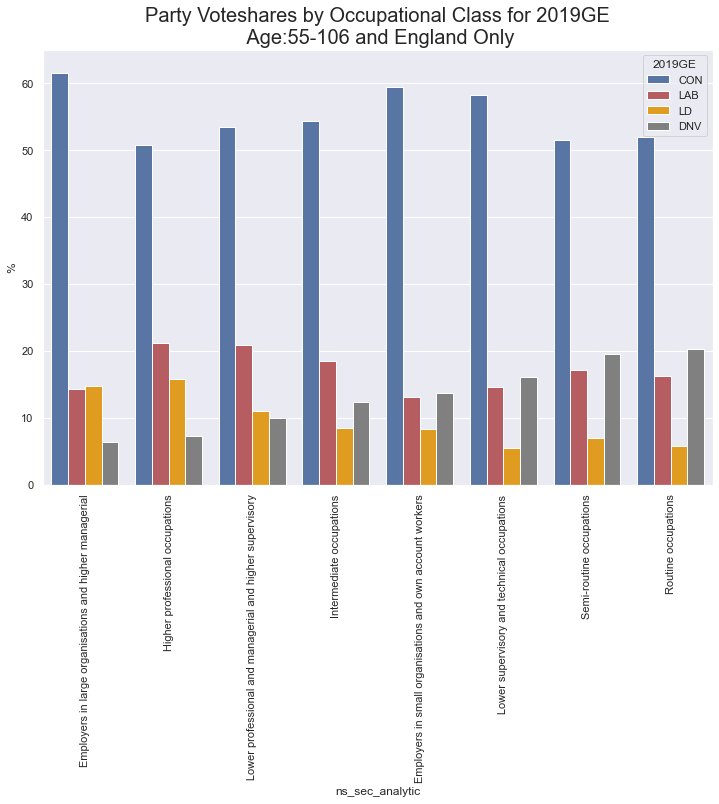

In [258]:
x_var = "ns_sec_analytic"
x_name = "Occupational Class"

GE_year = "2019GE"
age_cats = [4,5,6]
mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=(0,65))

In [259]:
search(BES_Panel,"work")

workingStatus                  32177
profile_work_industry          21643
profile_work_organisation      30618
profile_work_responsibility    18635
profile_work_stat              32177
profile_work_type              32177
dtype: int64

In [260]:
BES_Panel["profile_work_stat"]

id
2         Working part time (Less than 8 hours a week)
3                                              Retired
6        Working full time (30 or more hours per week)
7                                              Retired
14                                             Retired
                             ...                      
98435    Working full time (30 or more hours per week)
98437    Working full time (30 or more hours per week)
98440    Working full time (30 or more hours per week)
98445                                      Not working
98449                                      Not working
Name: profile_work_stat, Length: 32177, dtype: category
Categories (8, object): [Working full time (30 or more hours per week) < Working part time (8-29 hours a week) < Working part time (Less than 8 hours a week) < Full time student < Retired < Unemployed < Not working < Other]

In [263]:
BES_Panel["profile_work_organisation"]

id
2                                            Self-employed
3        Other public sector employer (e.g. Central Gov...
6        Nationalised industry or public corporation (e...
7        Private sector firm or company (e.g. limited c...
14       Nationalised industry or public corporation (e...
                               ...                        
98435    Nationalised industry or public corporation (e...
98437    Nationalised industry or public corporation (e...
98440    Private sector firm or company (e.g. limited c...
98445                                                  NaN
98449                                                  NaN
Name: profile_work_organisation, Length: 32177, dtype: category
Categories (7, object): [Self-employed < Private sector firm or company (e.g. limited c... < Nationalised industry or public corporation (e... < Other public sector employer (e.g. Central Gov... < Charity/voluntary sector < Other < Have never worked]

In [261]:
BES_Panel["profile_work_industry"]

id
2                                     Other
3                   Medical/Health Services
6        Government/Military/Public Service
7                                     Other
14                                    Other
                        ...                
98435                                   NaN
98437                                   NaN
98440                                   NaN
98445                                   NaN
98449                                   NaN
Name: profile_work_industry, Length: 32177, dtype: category
Categories (21, object): [Advertising/Marketing/PR < Aerospace < Agriculture/Chemicals/Forest Products < Automotive ... Telecommunications/Networking < Travel/Transportation < Other < Have never worked]

In [266]:
# BES_Panel["profile_work_type"]

In [265]:
# profile_work_industry          21643
# profile_work_organisation      30618
# profile_work_responsibility    18635
# profile_work_stat              32177
# profile_work_type              32177

df["profile_work_industry"] = BES_Panel["profile_work_industry"].loc[BES_Panel.index]
df["profile_work_organisation"] = BES_Panel["profile_work_organisation"].loc[BES_Panel.index]
df["profile_work_responsibility"] = BES_Panel["profile_work_responsibility"].loc[BES_Panel.index]
df["profile_work_stat"] = BES_Panel["profile_work_stat"].loc[BES_Panel.index]
df["profile_work_type"] = BES_Panel["profile_work_type"].loc[BES_Panel.index]

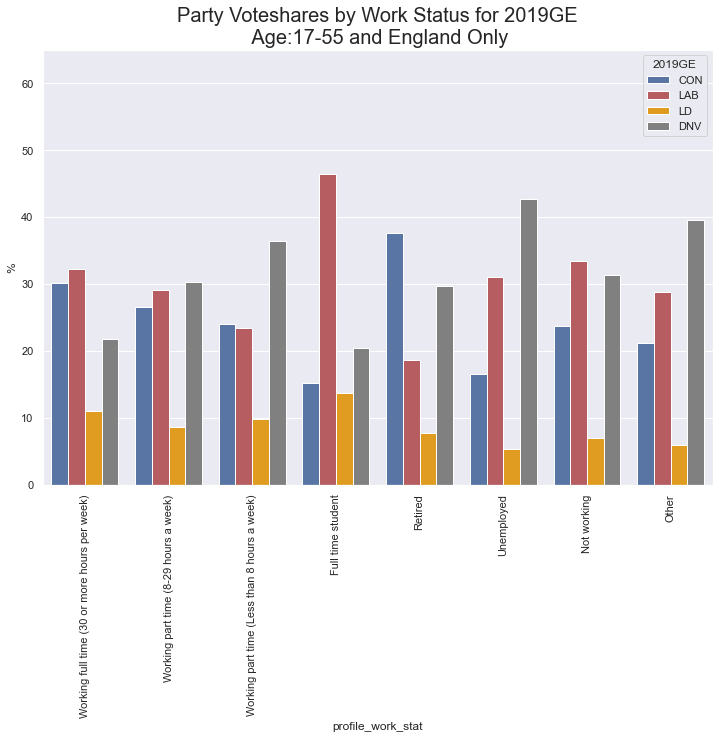

In [272]:
x_var = "profile_work_stat"
x_name = "Work Status"
ylim=(0,65)

GE_year = "2019GE"
age_cats = [0,1,2,3]
mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

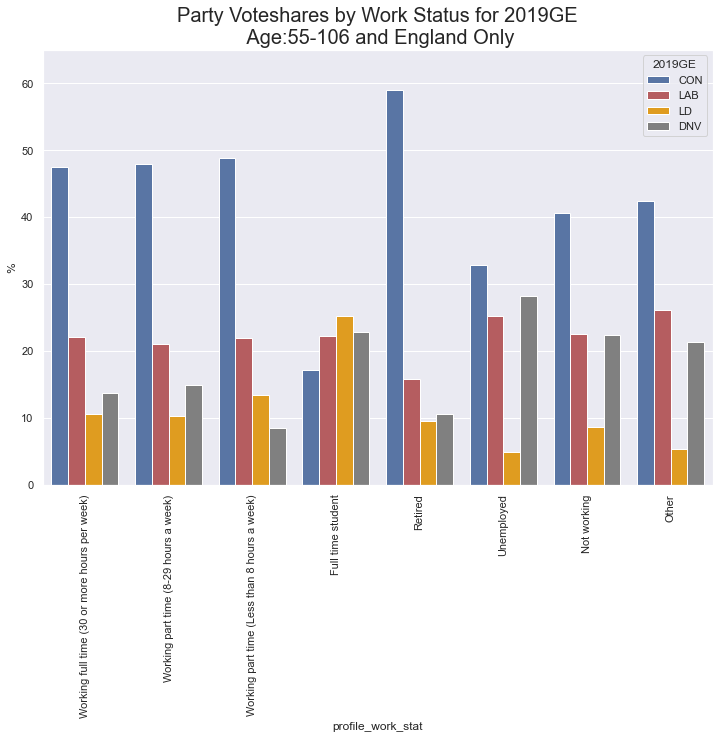

In [268]:
x_var = "profile_work_stat"
x_name = "Work Status"
ylim=(0,65)

GE_year = "2019GE"
age_cats = [4,5,6]
mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

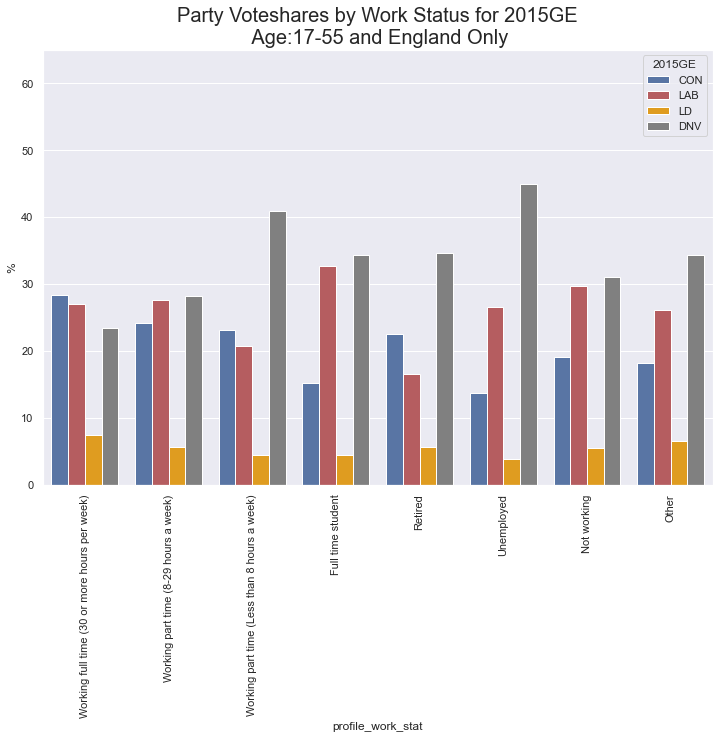

In [274]:
x_var = "profile_work_stat"
x_name = "Work Status"
ylim=(0,65)

GE_year = "2015GE"
age_cats = [0,1,2,3]
mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

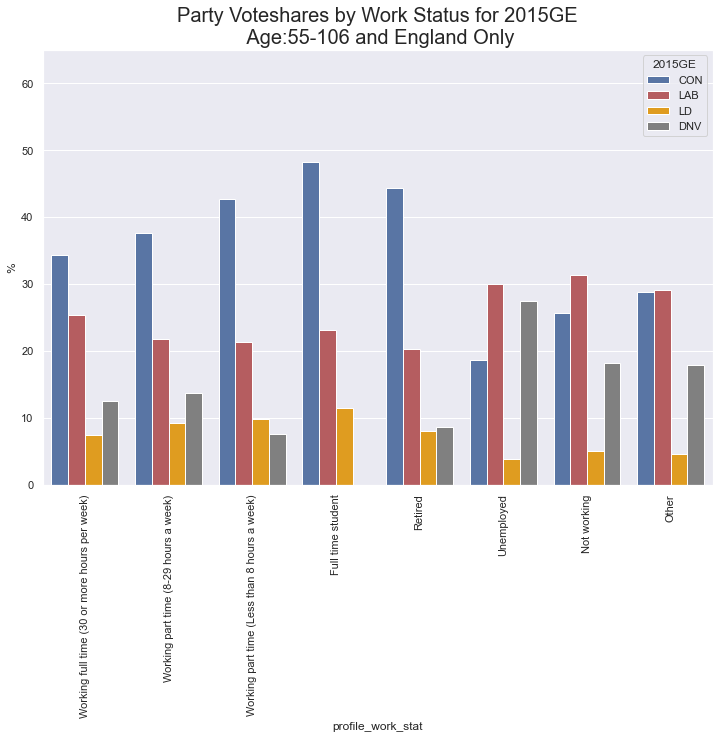

In [275]:
x_var = "profile_work_stat"
x_name = "Work Status"
ylim=(0,65)

GE_year = "2015GE"
age_cats = [4,5,6]
mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

In [ ]:
# profile_work_industry          21643
# profile_work_organisation      30618

# profile_work_stat              32177
# profile_work_type              32177

# profile_work_responsibility    18635

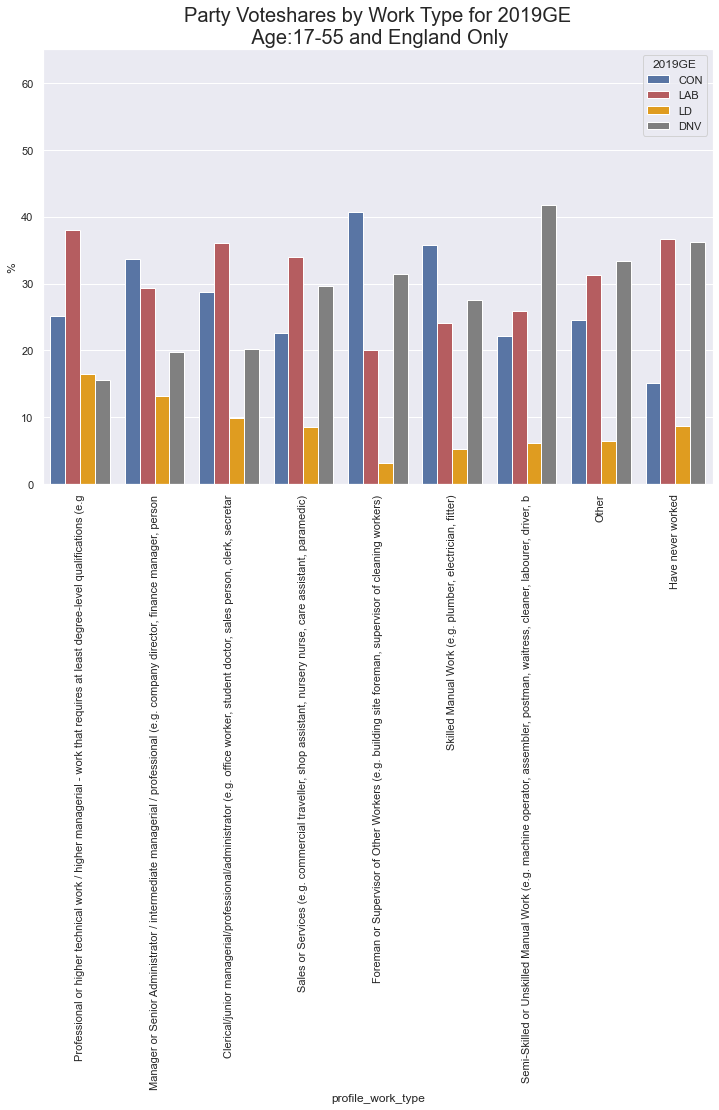

In [278]:
x_var = "profile_work_type"
x_name = "Work Type"
ylim=(0,65)

GE_year = "2019GE"
age_cats = [0,1,2,3]
mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

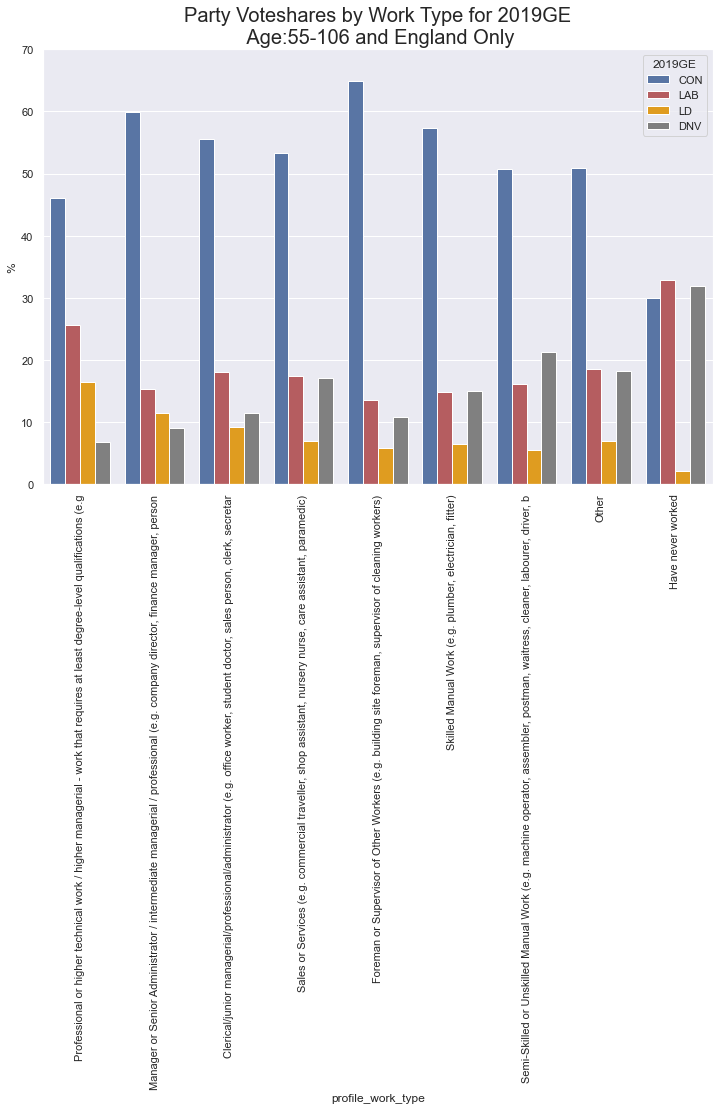

In [280]:
x_var = "profile_work_type"
x_name = "Work Type"
ylim=(0,70)

GE_year = "2019GE"
age_cats = [4,5,6]
mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

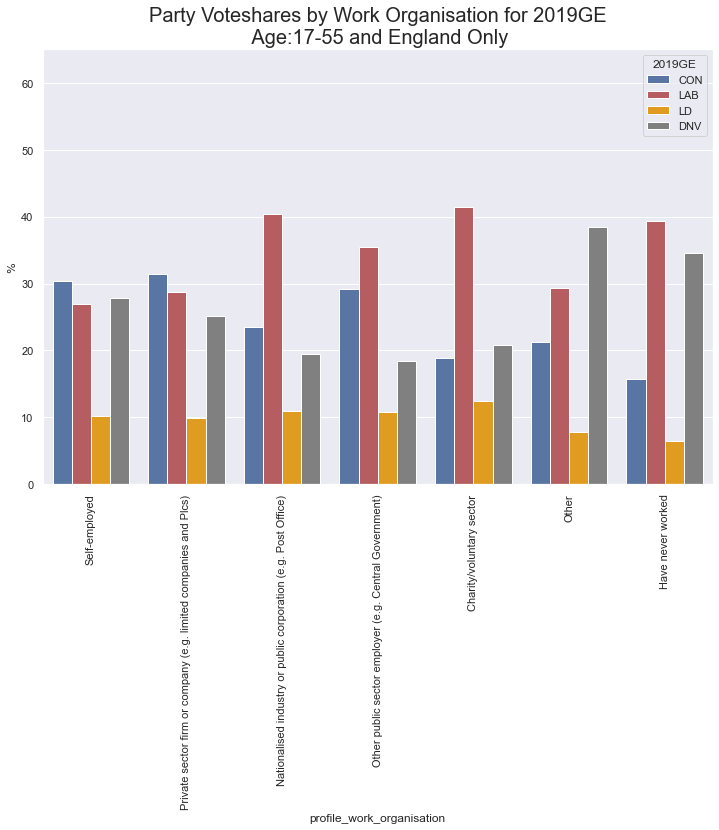

In [281]:
x_var = "profile_work_organisation"
x_name = "Work Organisation"
ylim=(0,65)

GE_year = "2019GE"
age_cats = [0,1,2,3]
mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

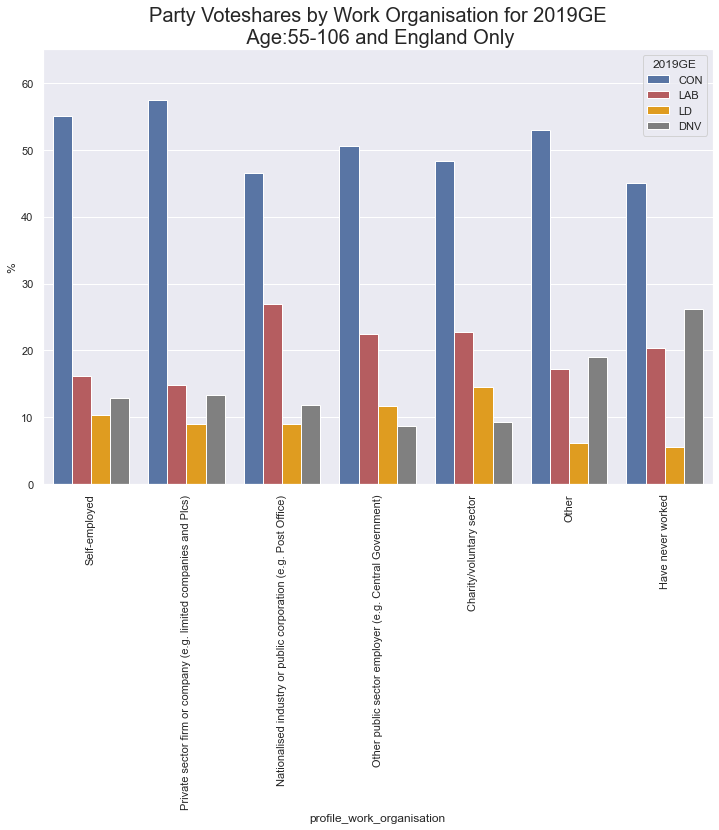

In [282]:
x_var = "profile_work_organisation"
x_name = "Work Organisation"
ylim=(0,65)

GE_year = "2019GE"
age_cats = [4,5,6]
mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

In [270]:
pd.crosstab(df["profile_work_stat"],df["2019GE"], margins=True)

2019GE,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV,TYTV(Maybe),UNK,All
profile_work_stat,,,,,,,,,,,,,
Working full time (30 or more hours per week),200,3547,67,354,3366,1347,162,63,475,1169,0,227,10977
Working part time (8-29 hours a week),72,1458,36,137,1109,461,79,25,168,504,0,61,4110
Working part time (Less than 8 hours a week),11,216,4,22,154,84,15,2,19,63,0,11,601
Full time student,4,97,5,32,315,90,6,3,38,88,3,29,710
Retired,311,6191,64,225,2075,1285,211,63,400,672,0,166,11663
Unemployed,22,189,10,18,278,52,16,3,25,201,0,26,840
Not working,81,778,26,58,728,211,46,16,97,393,0,53,2487
Other,21,219,9,17,239,52,17,8,30,134,1,42,789
All,722,12695,221,863,8264,3582,552,183,1252,3224,4,615,32177


In [271]:
pd.crosstab(df["profile_work_stat"][mask],df["2019GE"][mask], margins=True)

2019GE,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV,UNK,All
profile_work_stat,,,,,,,,,,,,
Working full time (30 or more hours per week),76,1076,12,75,551,293,42,1,0,176,25,2327
Working part time (8-29 hours a week),34,765,14,52,388,202,34,0,0,134,13,1636
Working part time (Less than 8 hours a week),7,137,1,11,70,47,11,0,0,13,4,301
Full time student,0,1,0,1,2,1,0,0,0,1,0,6
Retired,247,5316,55,214,1704,1101,187,1,1,555,133,9514
Unemployed,8,69,0,5,57,8,5,0,0,31,2,185
Not working,38,380,9,18,231,88,22,0,1,131,11,929
Other,9,101,4,6,71,19,5,0,0,32,6,253
All,419,7845,95,382,3074,1759,306,2,2,1073,194,15151


In [273]:
pd.crosstab(df["profile_work_stat"][mask],df["2019GE"][mask], margins=True)

2019GE,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV,TYTV(Maybe),UNK,All
profile_work_stat,,,,,,,,,,,,,
Working full time (30 or more hours per week),98,2086,46,255,2403,926,102,1,2,853,0,162,6934
Working part time (8-29 hours a week),25,550,19,75,585,207,42,0,1,309,0,35,1848
Working part time (Less than 8 hours a week),3,60,2,10,65,24,4,0,3,40,0,5,216
Full time student,3,79,5,30,277,82,6,0,1,70,3,22,578
Retired,5,54,1,3,23,15,4,1,0,13,0,0,119
Unemployed,13,96,9,10,196,39,11,0,0,139,0,18,531
Not working,33,320,13,35,420,95,20,0,0,218,0,34,1188
Other,9,92,3,9,130,30,10,0,0,89,0,31,403
All,189,3337,98,427,4099,1418,199,2,7,1731,3,307,11817


In [ ]:
### How to see explicit age effect?

## Look at Social Grade D/E
## Look at Con%/Lab% by age in 2005/2019

In [205]:
d_e_grades = df["profile_socialgrade_cie"].isin(["d","e"])

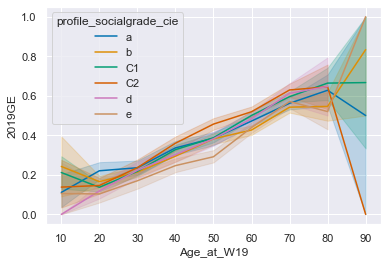

In [217]:
sns.lineplot(x=(df["Age_at_W19"]/10).astype(int)*10,y=df["2019GE"]=="CON",hue=df["profile_socialgrade_cie"])

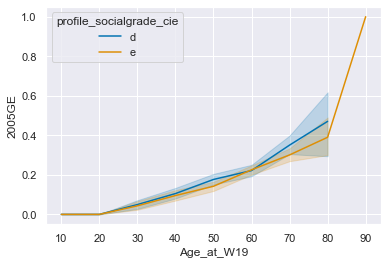

In [219]:
sns.lineplot(x=(df["Age_at_W19"]/10).astype(int)*10,y=df["2005GE"]=="CON",
             hue=df["profile_socialgrade_cie"].cat.remove_categories(["a","b","C1","C2"]).cat.remove_unused_categories())

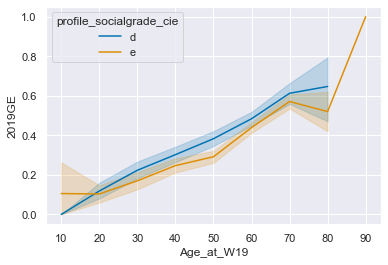

In [220]:
sns.lineplot(x=(df["Age_at_W19"]/10).astype(int)*10,y=df["2019GE"]=="CON",
             hue=df["profile_socialgrade_cie"].cat.remove_categories(["a","b","C1","C2"]).cat.remove_unused_categories())

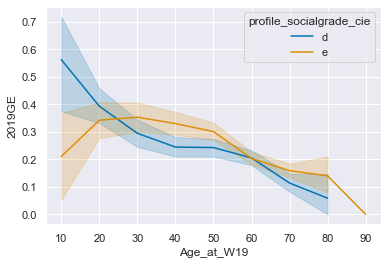

In [225]:
sns.lineplot(x=(df["Age_at_W19"]/10).astype(int)*10,y=df["2019GE"]=="LAB",
             hue=df["profile_socialgrade_cie"].cat.remove_categories(["a","b","C1","C2"]).cat.remove_unused_categories())

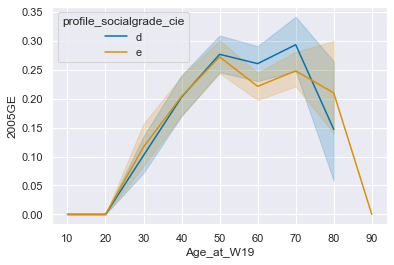

In [226]:
sns.lineplot(x=(df["Age_at_W19"]/10).astype(int)*10,y=df["2005GE"]=="LAB",
             hue=df["profile_socialgrade_cie"].cat.remove_categories(["a","b","C1","C2"]).cat.remove_unused_categories())

# 

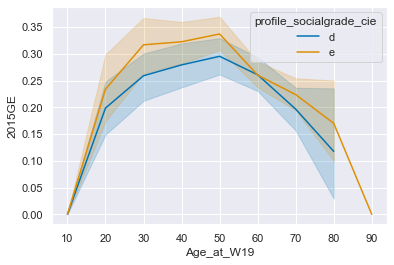

In [227]:
sns.lineplot(x=(df["Age_at_W19"]/10).astype(int)*10,y=df["2015GE"]=="LAB",
             hue=df["profile_socialgrade_cie"].cat.remove_categories(["a","b","C1","C2"]).cat.remove_unused_categories())

# 

In [237]:
df["mid_decade_W19"]=((df["Age_at_W19"]/10).astype(int)*10)+5
df["mid_decade_W19"] = df["mid_decade_W19"].replace(95,np.nan).replace(15,np.nan).replace(85,np.nan).replace(25,np.nan)

In [236]:
df["mid_decade_W19"].value_counts()

65    8543
55    6148
75    5409
45    4947
35    3630
25    2619
85     613
15     252
95      16
Name: mid_decade_W19, dtype: int64

In [241]:
df.groupby("mid_decade_W19").apply(lambda x: (x["2019GE"]=="CON").mean())-df.groupby("mid_decade_W19").apply(lambda x: (x["2005GE"]=="CON").mean())

mid_decade_W19
35.0    0.134435
45.0    0.162523
55.0    0.180872
65.0    0.202856
75.0    0.219264
dtype: float64

In [242]:
df.groupby("mid_decade_W19").apply(lambda x: (x["2019GE"]=="LAB").mean())-df.groupby("mid_decade_W19").apply(lambda x: (x["2005GE"]=="LAB").mean())

mid_decade_W19
35.0    0.238843
45.0    0.086719
55.0    0.007645
65.0   -0.023294
75.0   -0.075245
dtype: float64

In [243]:
df[d_e_grades].groupby("mid_decade_W19").apply(lambda x: (x["2019GE"]=="CON").mean())-df[d_e_grades].groupby("mid_decade_W19").apply(lambda x: (x["2005GE"]=="CON").mean())

mid_decade_W19
35.0    0.152338
45.0    0.174374
55.0    0.175405
65.0    0.232186
75.0    0.267750
dtype: float64

In [244]:
df[~d_e_grades].groupby("mid_decade_W19").apply(lambda x: (x["2019GE"]=="CON").mean())-df[~d_e_grades].groupby("mid_decade_W19").apply(lambda x: (x["2005GE"]=="CON").mean())

mid_decade_W19
35.0    0.130435
45.0    0.159376
55.0    0.182707
65.0    0.193519
75.0    0.205896
dtype: float64

In [ ]:
x_var = "house_tenure"
x_name = "House Tenure"

GE_year = "2005GE"
age_cats = [0,1,2,3]

mask,mask_str = get_mask(age_cats)
voteshare_split(GE_year,age_cats,xtick_rot=90,ylim=ylim)

In [374]:
pan_dataset_allr_values["surridge_lr"] = pd.qcut(pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"],q=3,labels=["Left","Centre","Right"])
pan_dataset_allr_values["surridge_al"] = pd.qcut(pan_dataset_allr_values['Social: Liberalism(0) <-> Conservatism(200){uniform}'],q=3,labels=["Liberal","Moderate","Authoritarian"])
pan_dataset_allr_values["surridge"] = pan_dataset_allr_values["surridge_al"].astype(str)+"-"+pan_dataset_allr_values["surridge_lr"].astype(str)

In [376]:
search(BES_Panel,"leftRight")

leftRight    32177
dtype: int64

In [401]:
df=BES_Panel[["leftRight","wt"]]
df["leftRight"] = df["leftRight"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

In [402]:
df["surridge"] = pan_dataset_allr_values.loc[df.index,"surridge"]
df["surridge"] = df["surridge"].replace("nan-nan",np.nan)
df = df.dropna()

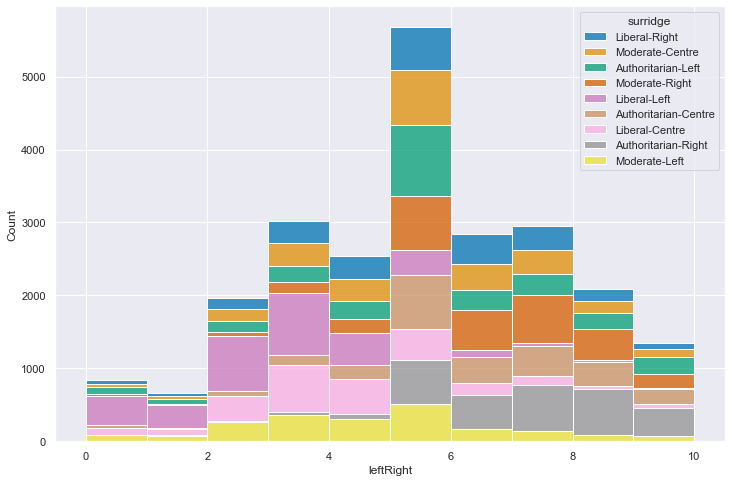

In [403]:
plt.figure(figsize=(12,8))
sns.histplot(data=df.dropna(),x="leftRight",hue="surridge",multiple="stack",weights="wt");

In [398]:
df.shape

(32177, 2)

In [405]:
search(BES_Panel,"Blair")

blairGoodW1     30564
likeBlairW11    30956
dtype: int64

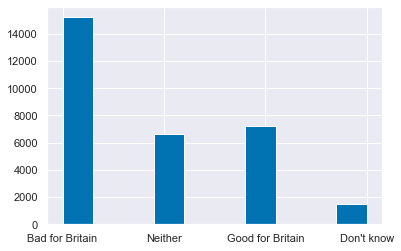

In [409]:
BES_Panel["blairGoodW1"].hist()

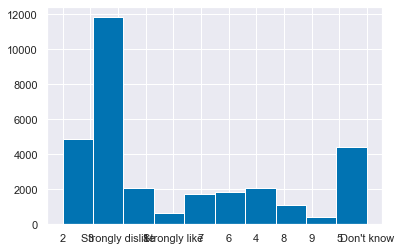

In [410]:
BES_Panel["likeBlairW11"].hist()

In [287]:
round(pd.crosstab(pan_dataset_votes.loc[BES_Panel.index]["2017GEVote_complete"],
            pan_dataset_votes.loc[BES_Panel.index]["2019GEVote_complete"],
            values=BES_Panel["wt"],aggfunc=sum,margins=True, normalize='all')*100,1)

2019GEVote_complete,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV,TYTV(Maybe),UNK,All
2017GEVote_complete,,,,,,,,,,,,,
CON,0.5,24.6,0.2,0.3,1.1,1.9,0.3,0.0,0.1,2.0,0.0,0.7,31.6
DK,0.0,0.5,0.3,0.1,0.2,0.1,0.0,0.0,0.0,0.3,0.0,0.3,1.9
GP,0.0,0.2,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.2,0.0,0.1,1.7
LAB,0.4,3.1,0.3,0.7,19.0,2.2,0.3,0.1,0.4,3.0,0.0,0.9,30.4
LD,0.1,0.7,0.0,0.2,1.0,3.4,0.1,0.0,0.1,0.4,0.0,0.2,6.1
OTH,0.0,0.3,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.2,0.0,0.1,1.0
PC,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.3
SNP,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,2.0,0.2,0.0,0.1,2.6
UKIP,0.3,1.2,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.3,0.0,0.0,2.1


In [290]:
%%time
dataset_name = "W17_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')


Toggle code

Wall time: 1.29 s


In [291]:
round(pd.crosstab(pan_dataset_votes.loc[BES_Panel.index]["2015GEVote_complete"],
            pan_dataset_votes.loc[BES_Panel.index]["2017GEVote_complete"],
            values=BES_Panel["wt"],aggfunc=sum,margins=True, normalize='all')*100,1)

2017GEVote_complete,CON,DK,GP,LAB,LD,OTH,PC,SNP,UKIP,DNV,TYTV(Def),TYTV(Maybe),UNK,All
2015GEVote_complete,,,,,,,,,,,,,,
BNP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
CON,21.8,0.3,0.1,2.2,1.0,0.1,0.0,0.0,0.1,1.1,0.0,0.0,0.1,26.9
DK,0.5,0.6,0.0,0.6,0.1,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,2.2
GP,0.2,0.1,0.5,2.1,0.4,0.0,0.0,0.1,0.0,0.2,0.0,0.0,0.0,3.5
LAB,1.7,0.3,0.2,18.9,0.9,0.1,0.0,0.1,0.1,1.1,0.0,0.0,0.1,23.5
LD,1.1,0.1,0.1,1.8,2.6,0.1,0.0,0.0,0.0,0.4,0.0,0.0,0.0,6.2
OTH,0.3,0.1,0.0,0.3,0.1,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.0,1.1
PC,0.0,0.0,0.0,0.1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.4
SNP,0.2,0.0,0.0,0.4,0.0,0.0,0.0,1.8,0.0,0.2,0.0,0.0,0.0,2.8
